In [0]:
!pip install gdown

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [0]:
!gdown --id 16VDAc-x1fGa2lpsI8xtLHK6z_3m36JBx --output auto.csv 

Downloading...
From: https://drive.google.com/uc?id=16VDAc-x1fGa2lpsI8xtLHK6z_3m36JBx
To: /content/auto.csv
100% 20.5k/20.5k [00:00<00:00, 34.6MB/s]


In [0]:
auto_df = pd.read_csv("auto.csv", index_col=0)

In [0]:
auto_df.shape

(392, 9)

In [0]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## Exploration

In [0]:
missing = auto_df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

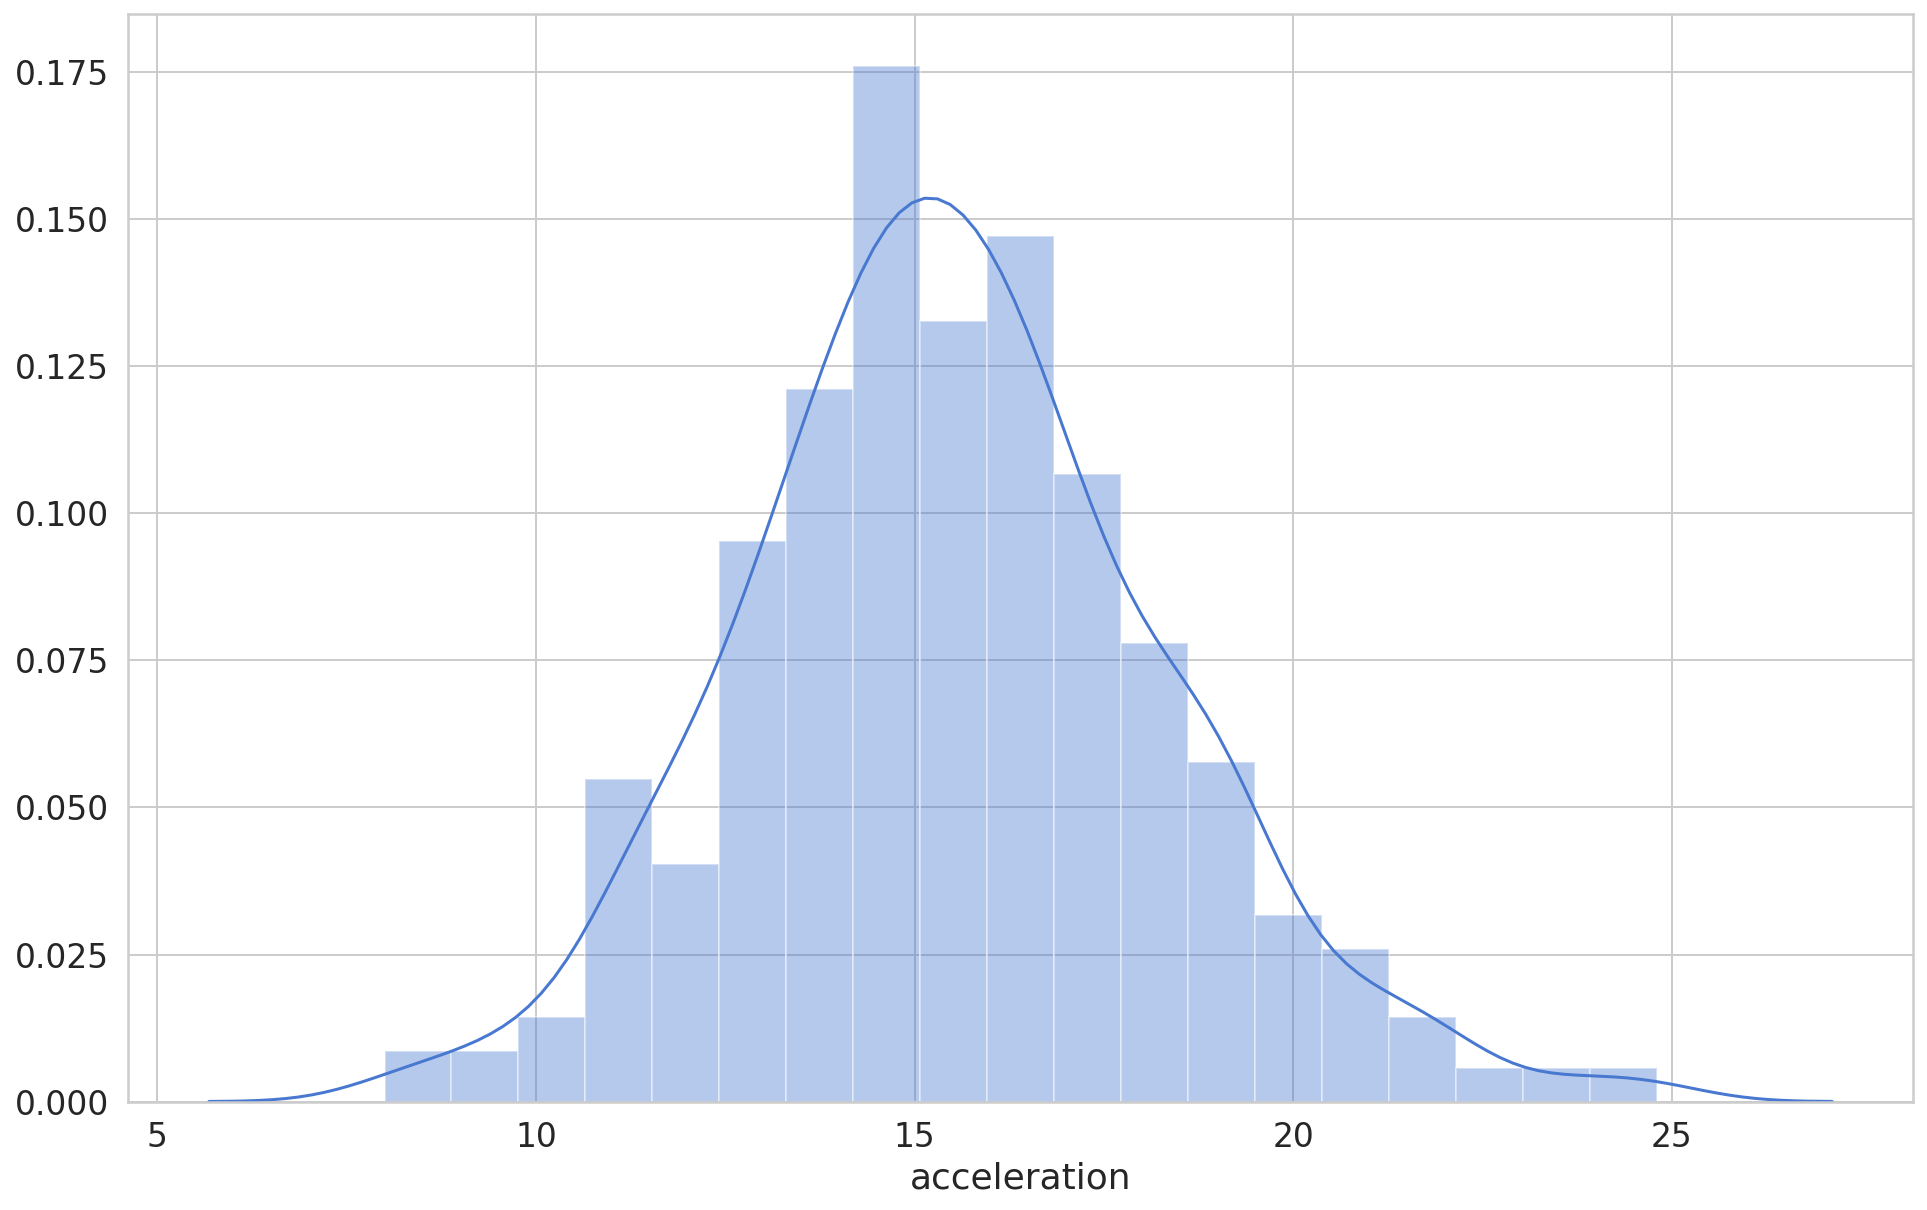

In [0]:
sns.distplot(auto_df.acceleration);

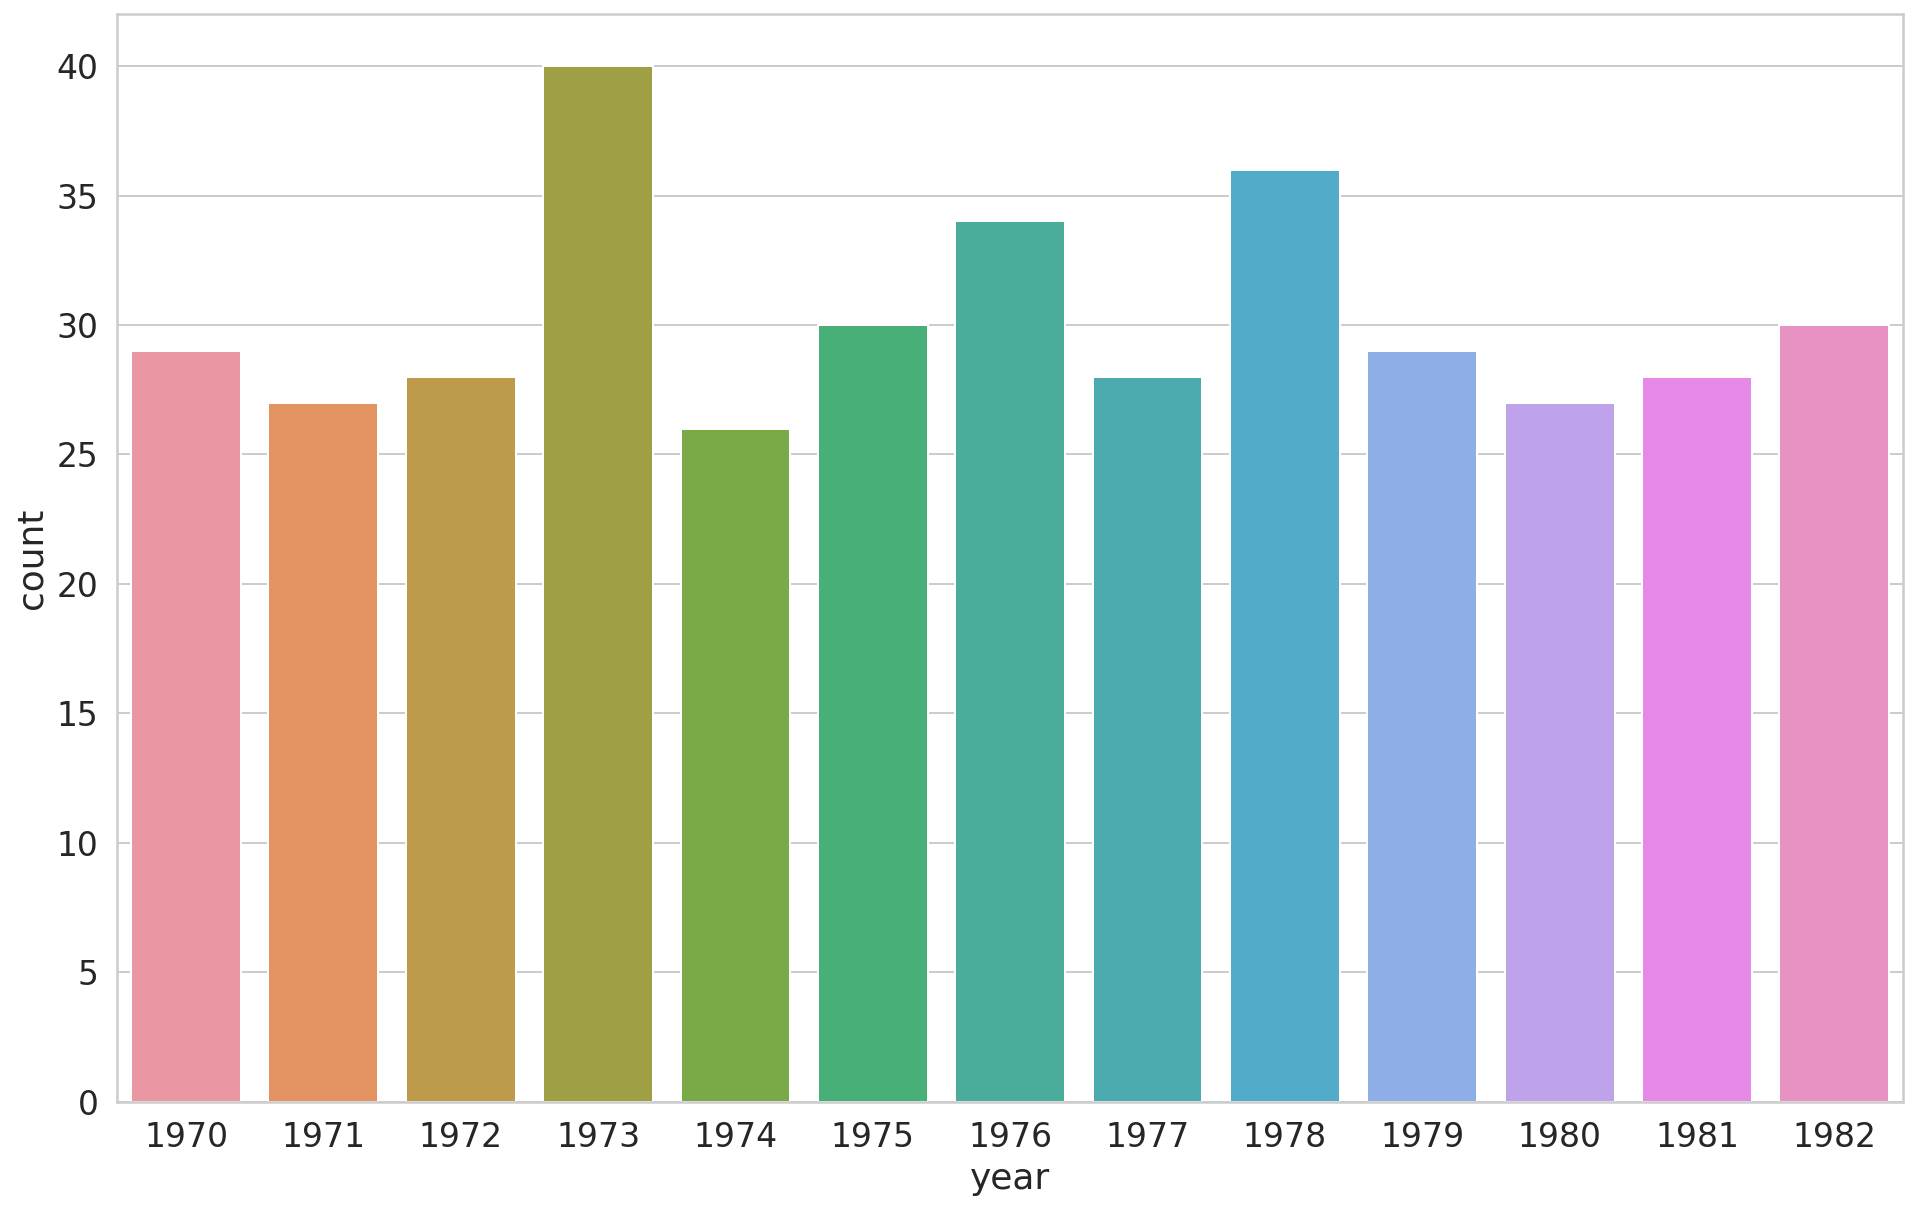

In [0]:
sns.countplot(auto_df.year + 1900);

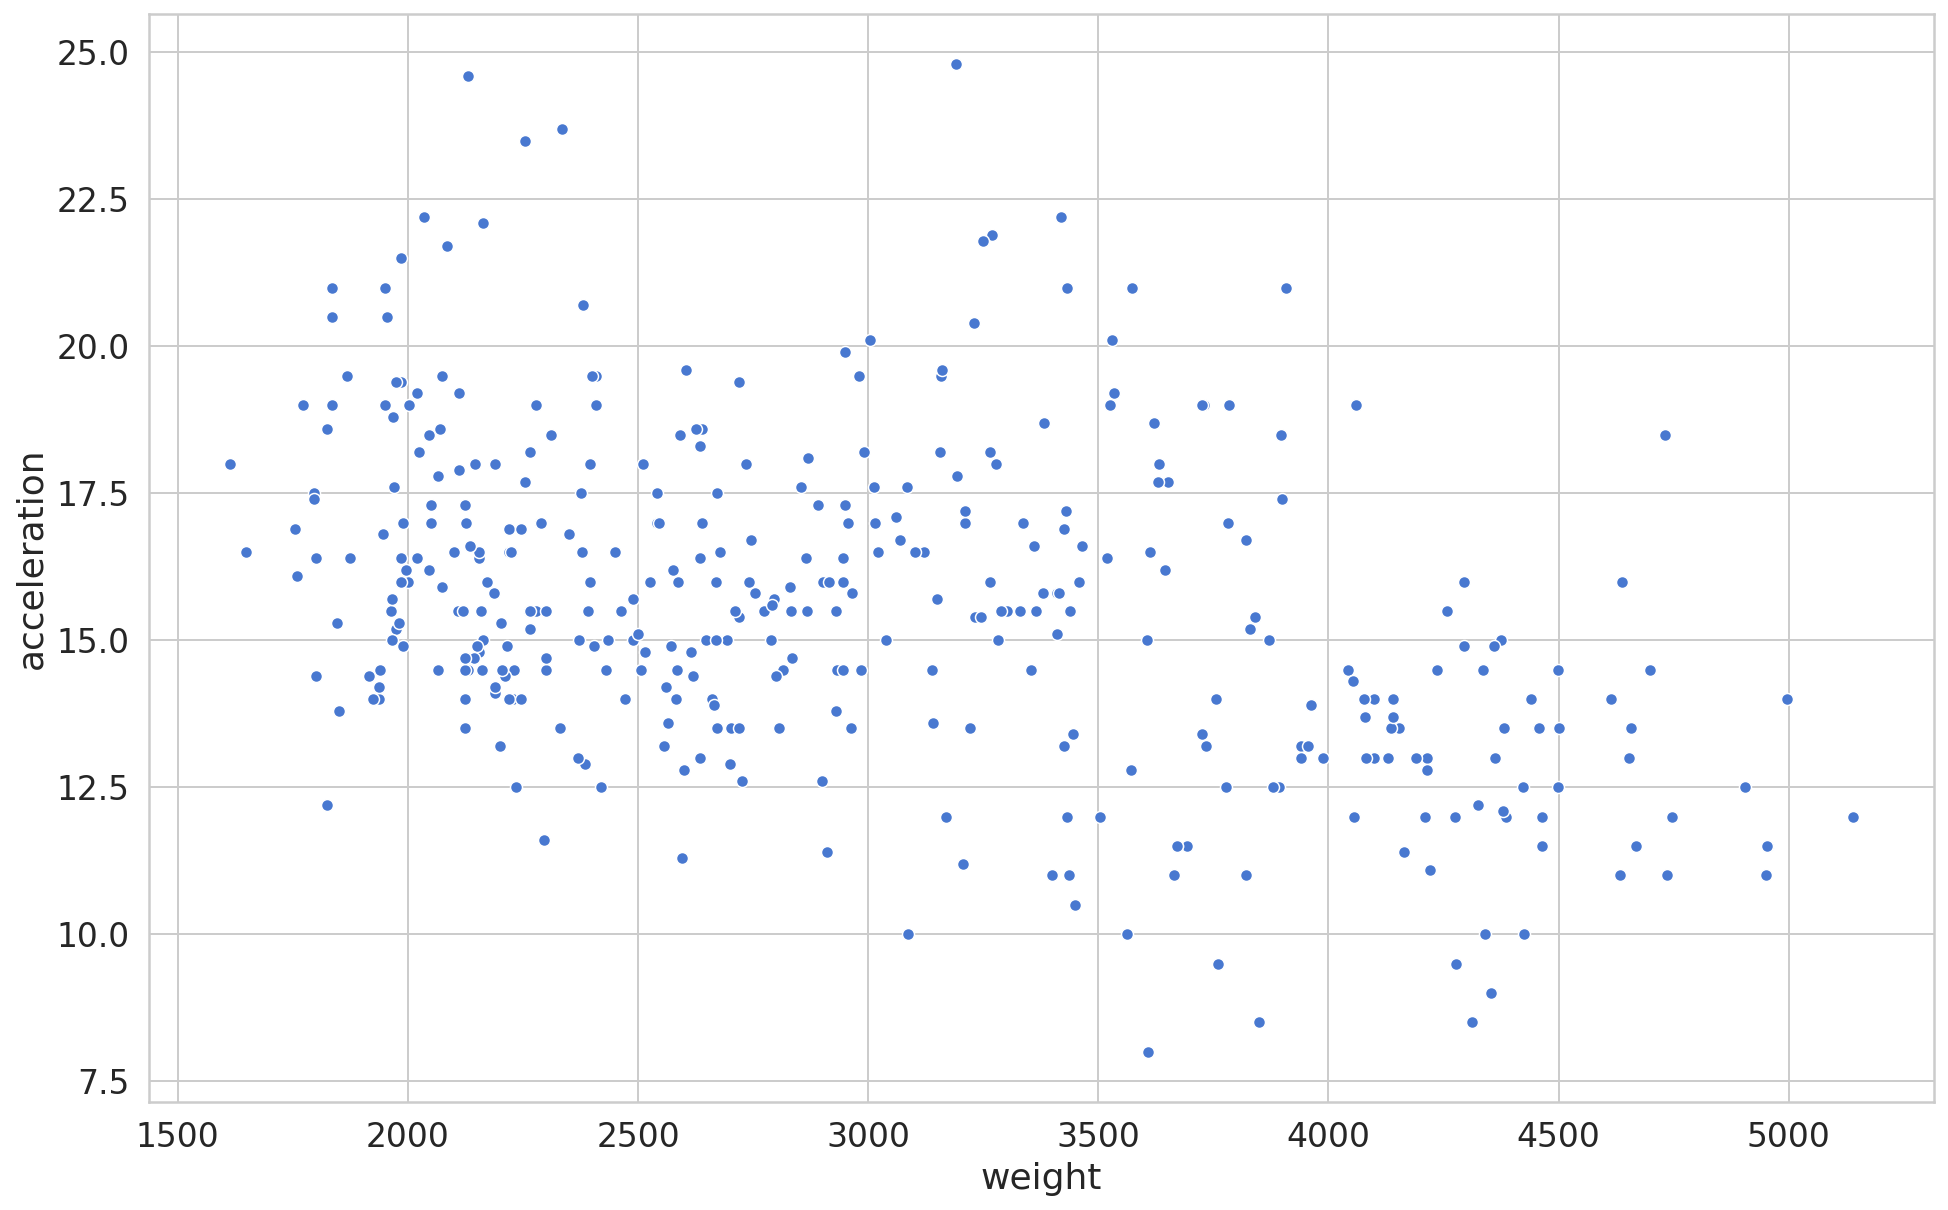

In [0]:
sns.scatterplot(auto_df.weight, auto_df.acceleration);

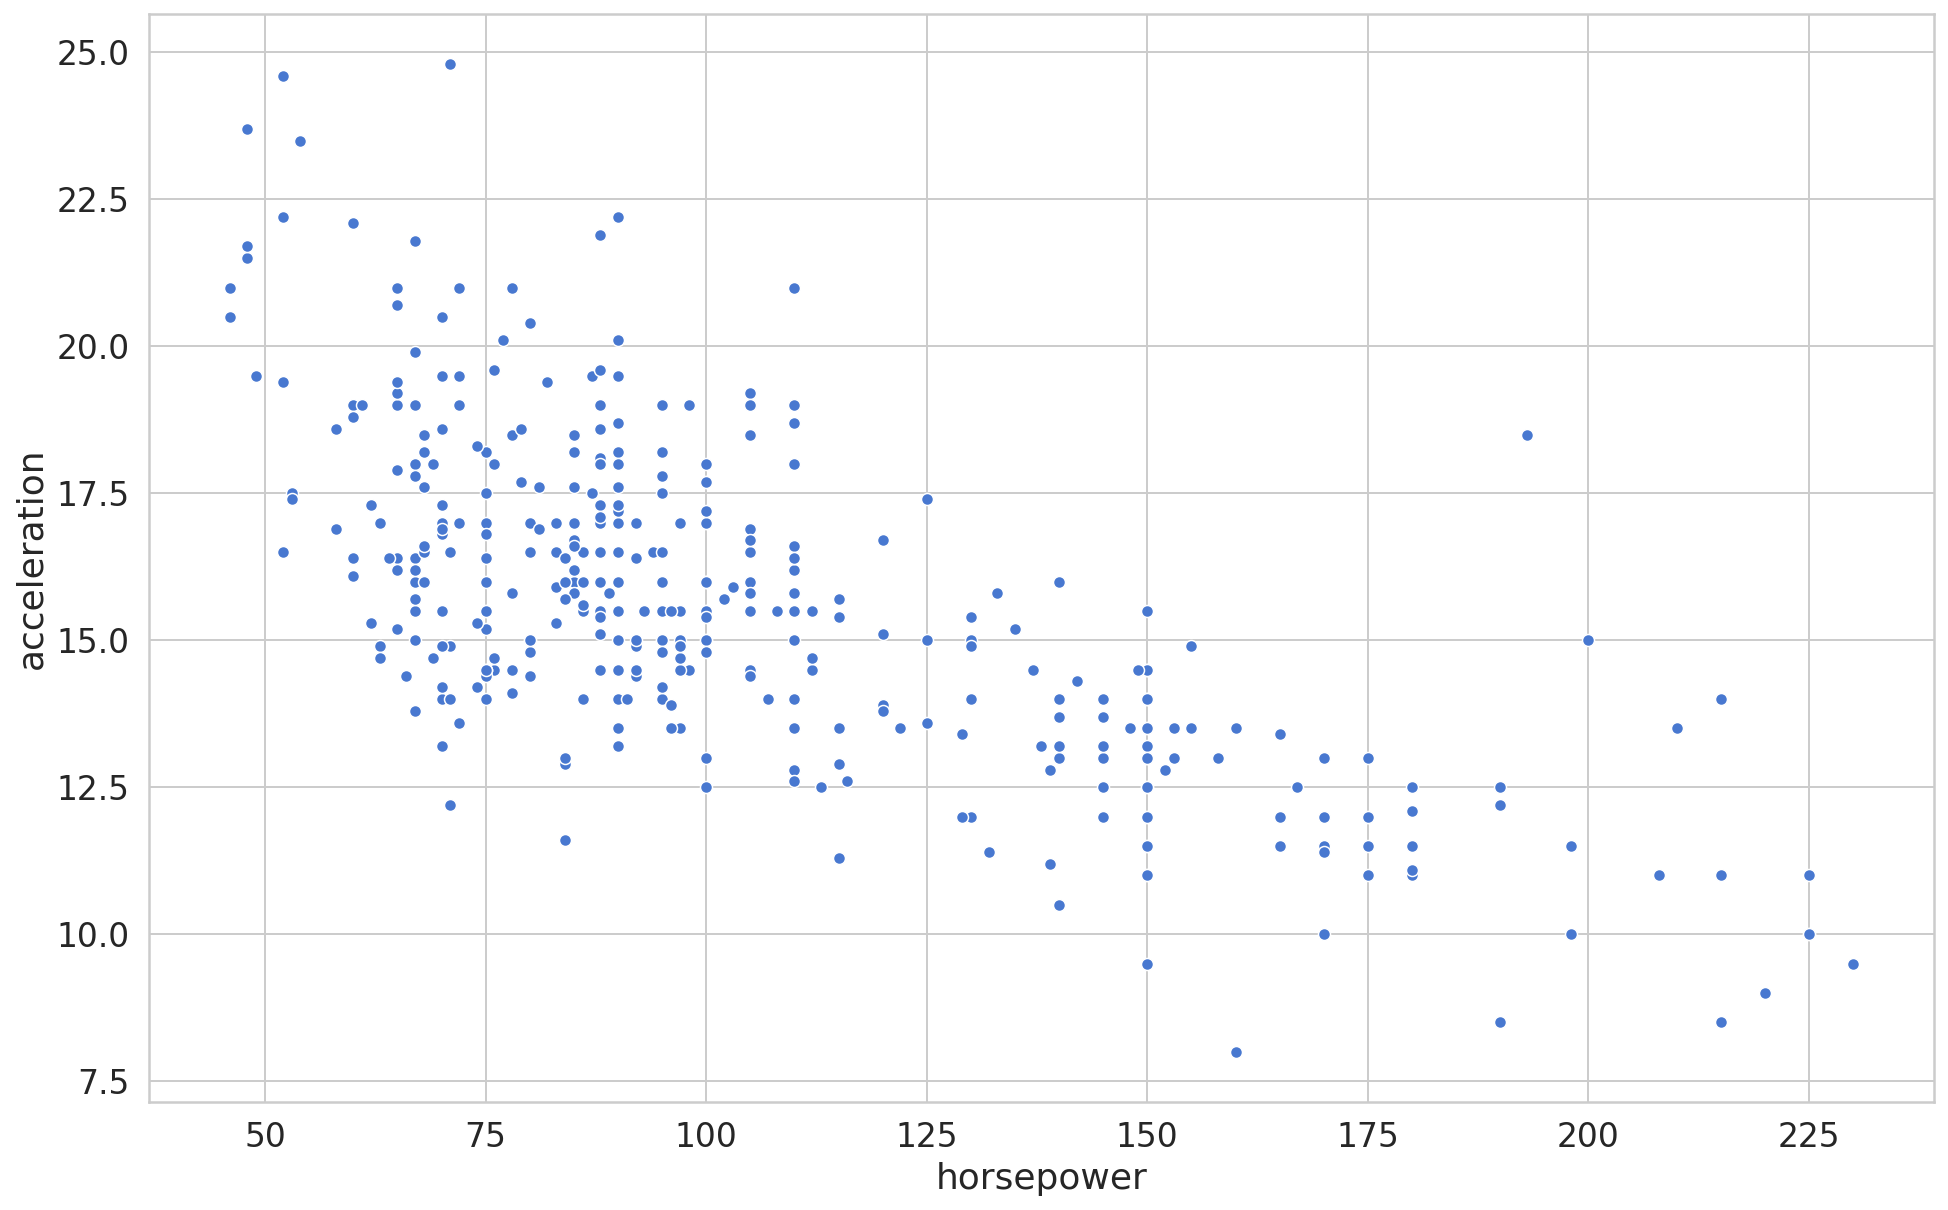

In [0]:
sns.scatterplot(auto_df.horsepower, auto_df.acceleration);

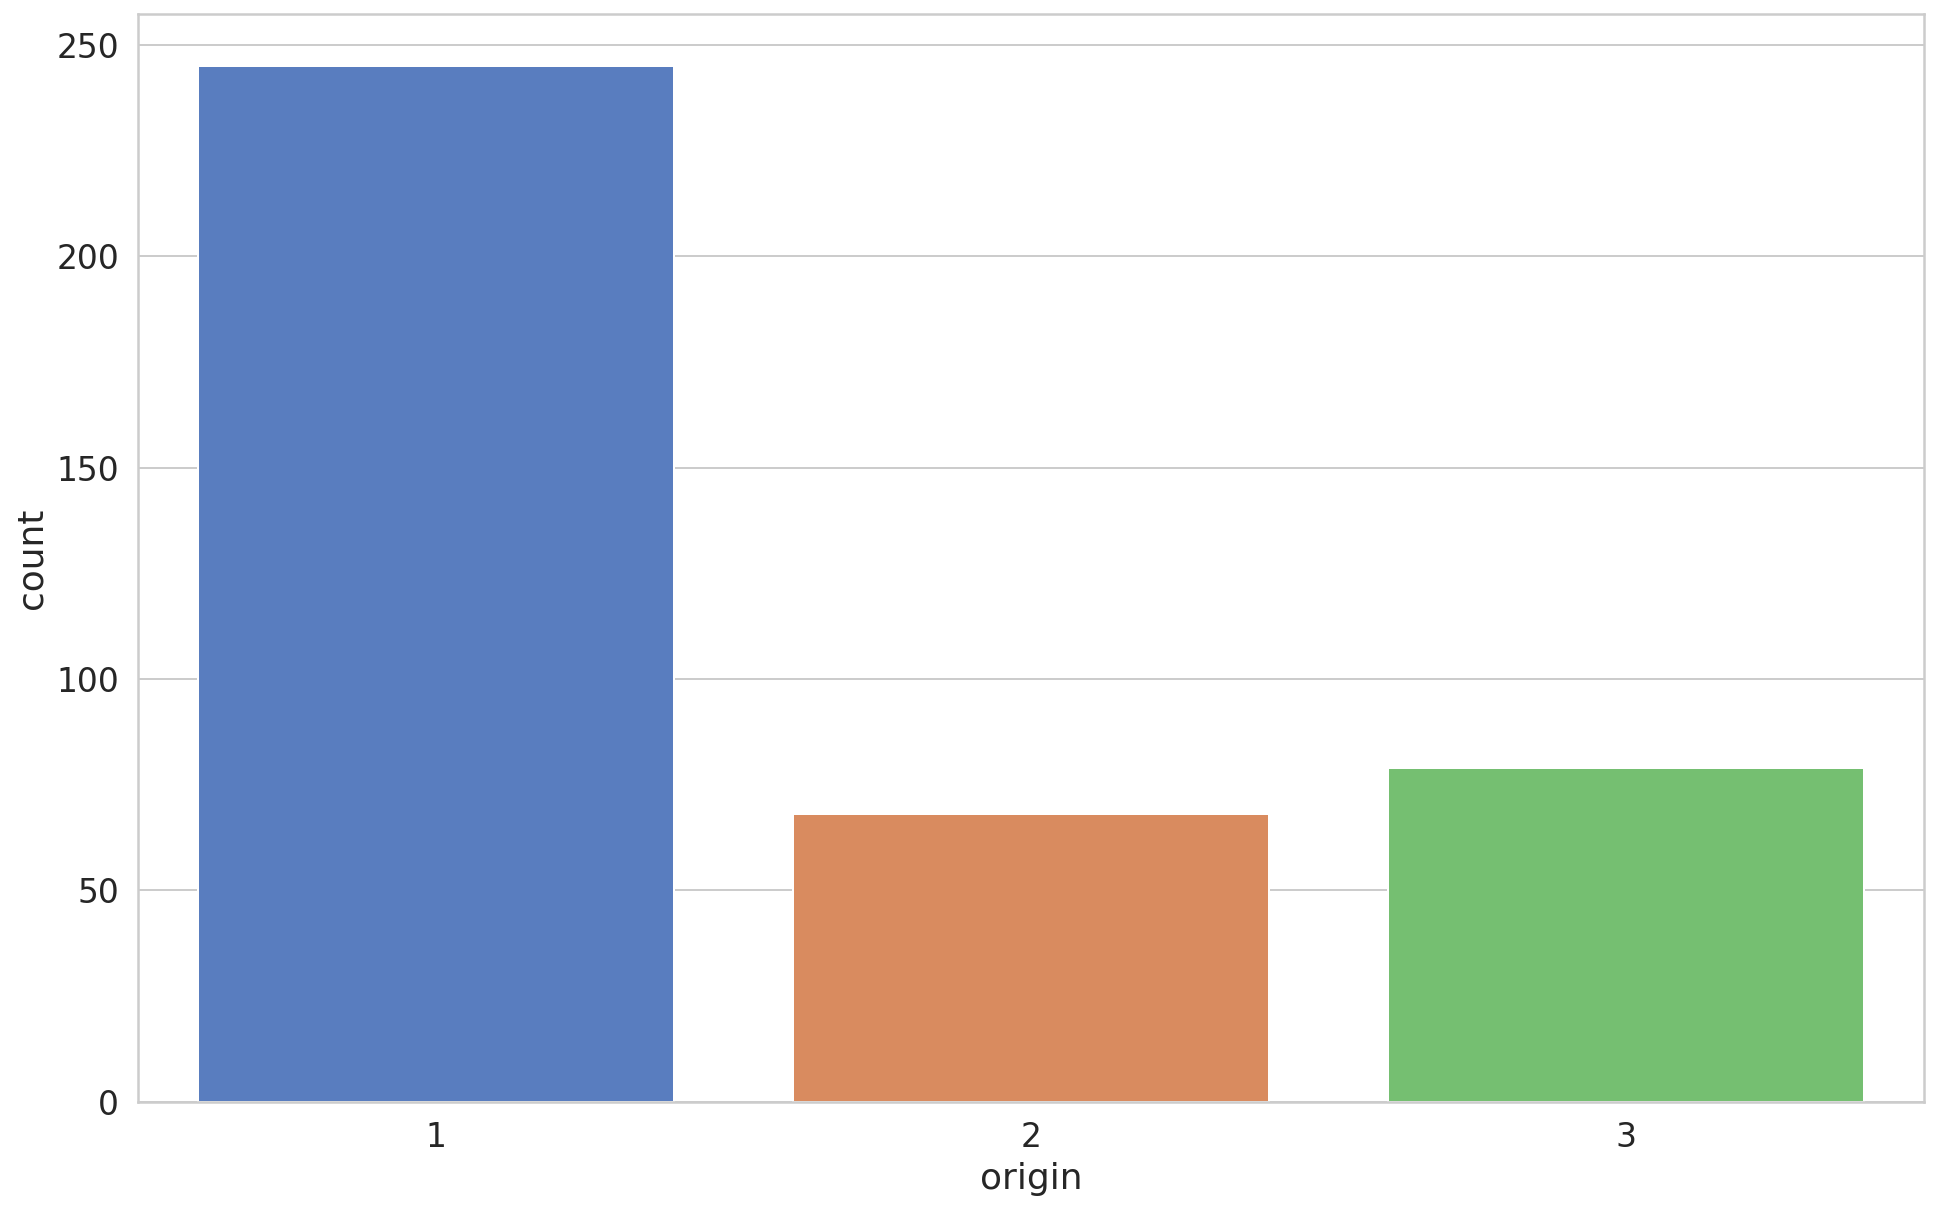

In [0]:
sns.countplot(auto_df.origin);

In [0]:
auto_df['is_american'] = (auto_df.origin == 1).astype(int)

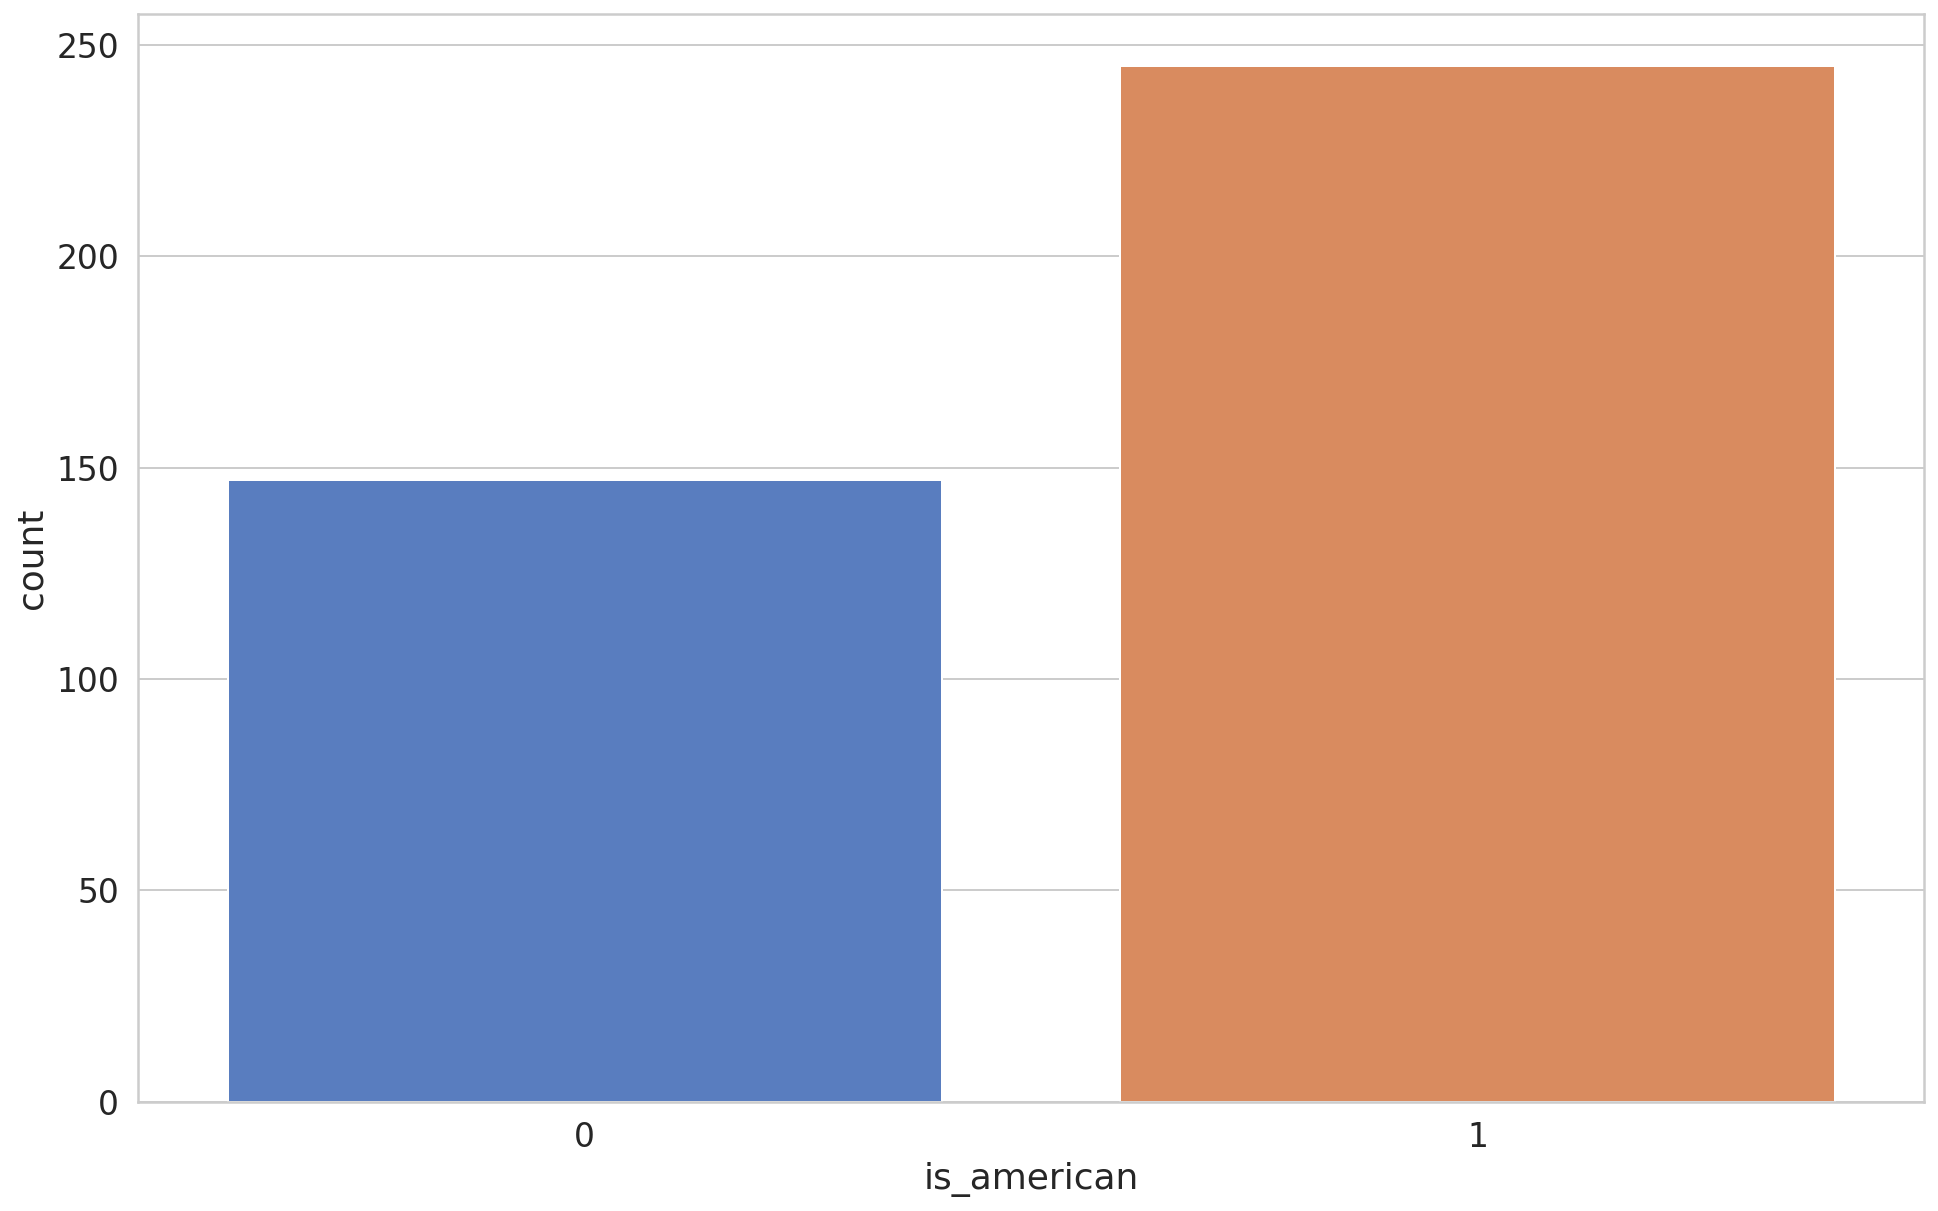

In [0]:
sns.countplot(auto_df.is_american);

In [0]:
from sklearn.preprocessing import StandardScaler

def create_regression_dataset(
    df, 
    columns=['mpg', 'weight', 'horsepower']
):

  all_columns = columns.copy()
  all_columns.append('acceleration')

  reg_df = df[all_columns]
  reg_df = StandardScaler().fit_transform(reg_df[all_columns])
  reg_df = pd.DataFrame(reg_df, columns=all_columns)

  return reg_df[columns], reg_df.acceleration

In [0]:
def create_classification_dataset(df):
  columns = ['mpg', 'weight', 'horsepower']

  X = df[columns]
  X = StandardScaler().fit_transform(X)
  X = pd.DataFrame(X, columns=columns)

  return X, df.is_american

In [0]:
from sklearn.model_selection import KFold, cross_val_score

def eval_model(model, X, y, score):
  cv = KFold(n_splits=10, random_state=RANDOM_SEED)
  results = cross_val_score(model, X, y, cv=cv, scoring=score) 
  return np.abs(results.mean())

def eval_classifier(model, X, y):
  return eval_model(model, X, y, score="accuracy")

def eval_regressor(model, X, y):
  return eval_model(model, X, y, score="neg_mean_squared_error")

# Simple Linear Regression

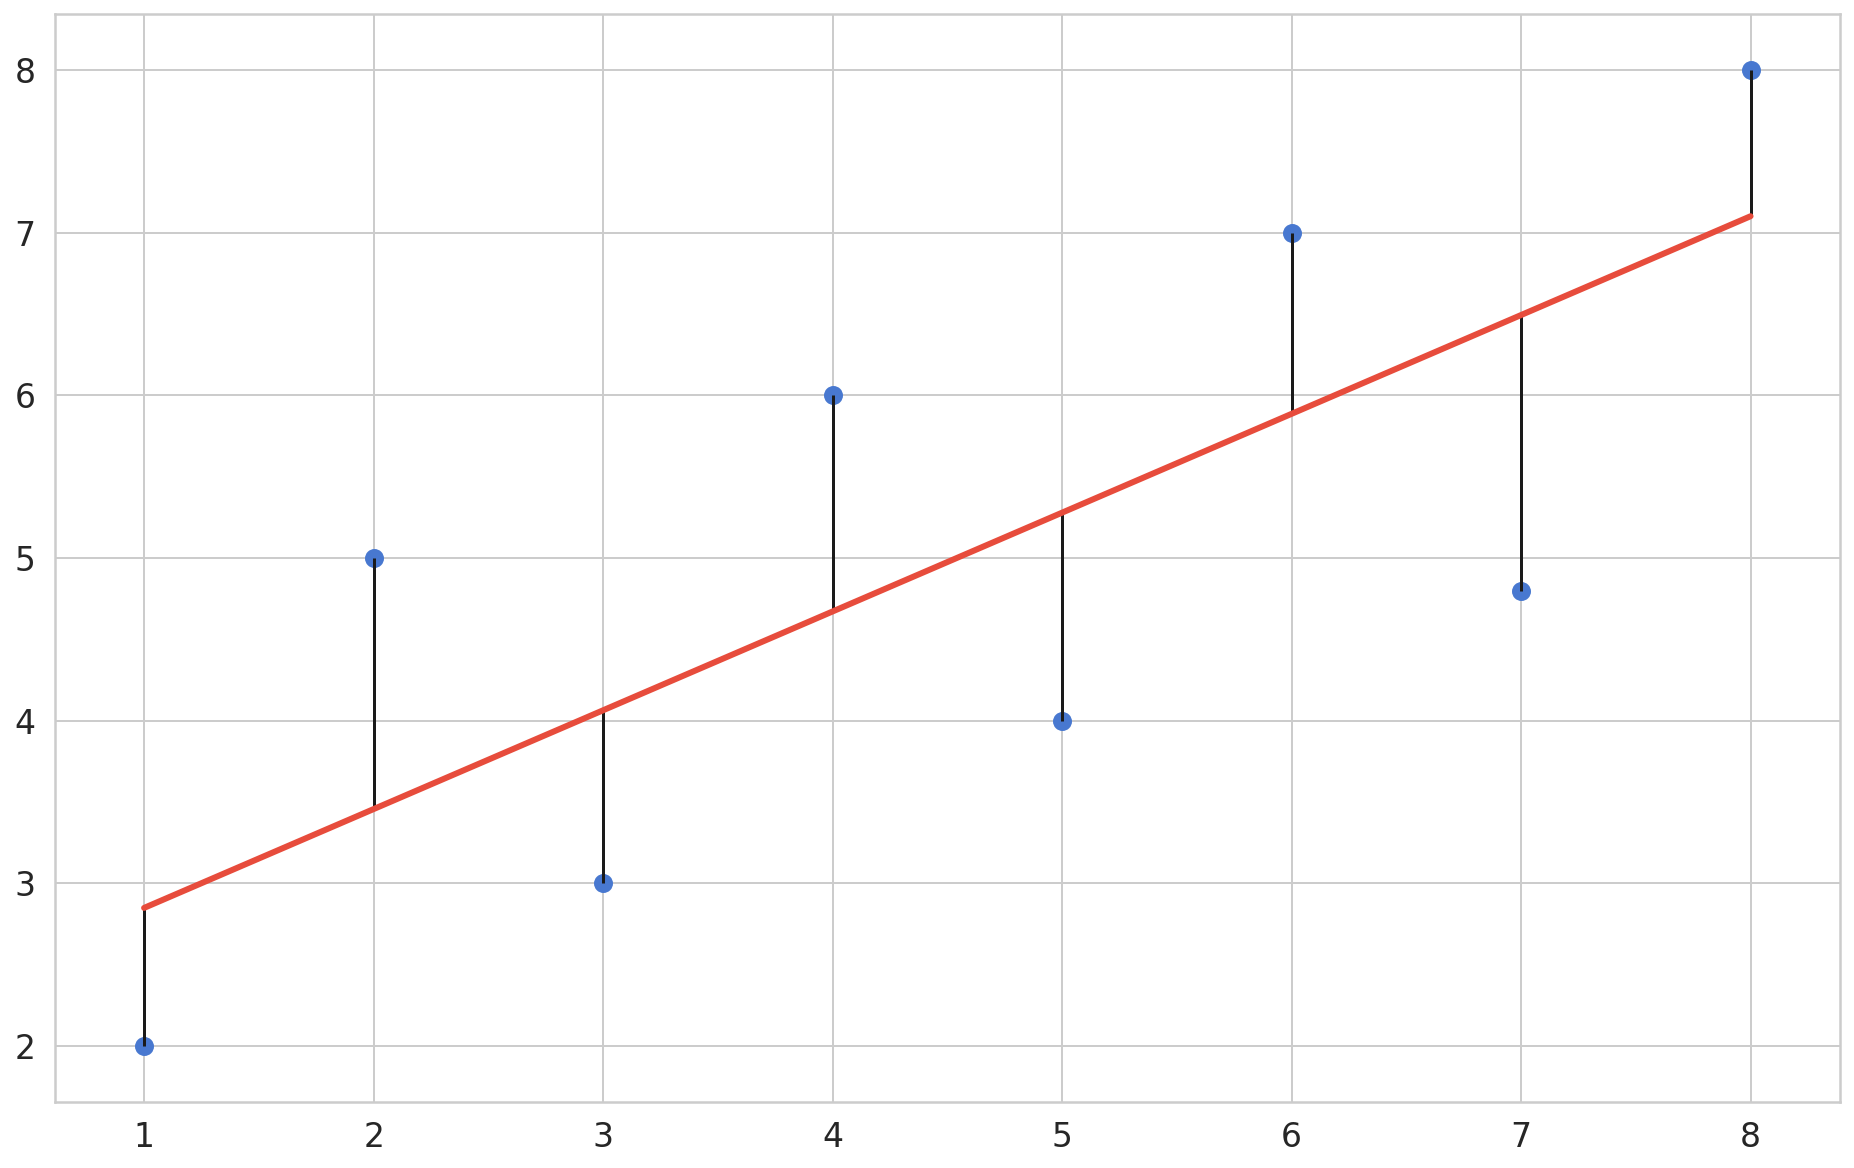

In [0]:
from sklearn.linear_model import LinearRegression

X = np.array([
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
])

y = np.array([2, 5, 3, 6, 4, 7, 4.8, 8])

X = np.expand_dims(X, axis=1)

reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)

fig, ax = plt.subplots()

ax.plot(X, y_pred, linewidth=3, color="#e74c3c")
ax.scatter(X, y, s=72)
ax.vlines(X, y_pred, y);

In [0]:
from sklearn.linear_model import LinearRegression

X, y = create_regression_dataset(auto_df, columns=['horsepower'])

reg = LinearRegression()
eval_regressor(reg, X, y)

0.5283214994429212

In [0]:
reg = LinearRegression().fit(X, y)

In [0]:
reg.coef_

array([-0.68919551])

In [0]:
reg.intercept_

3.101019649075953e-16

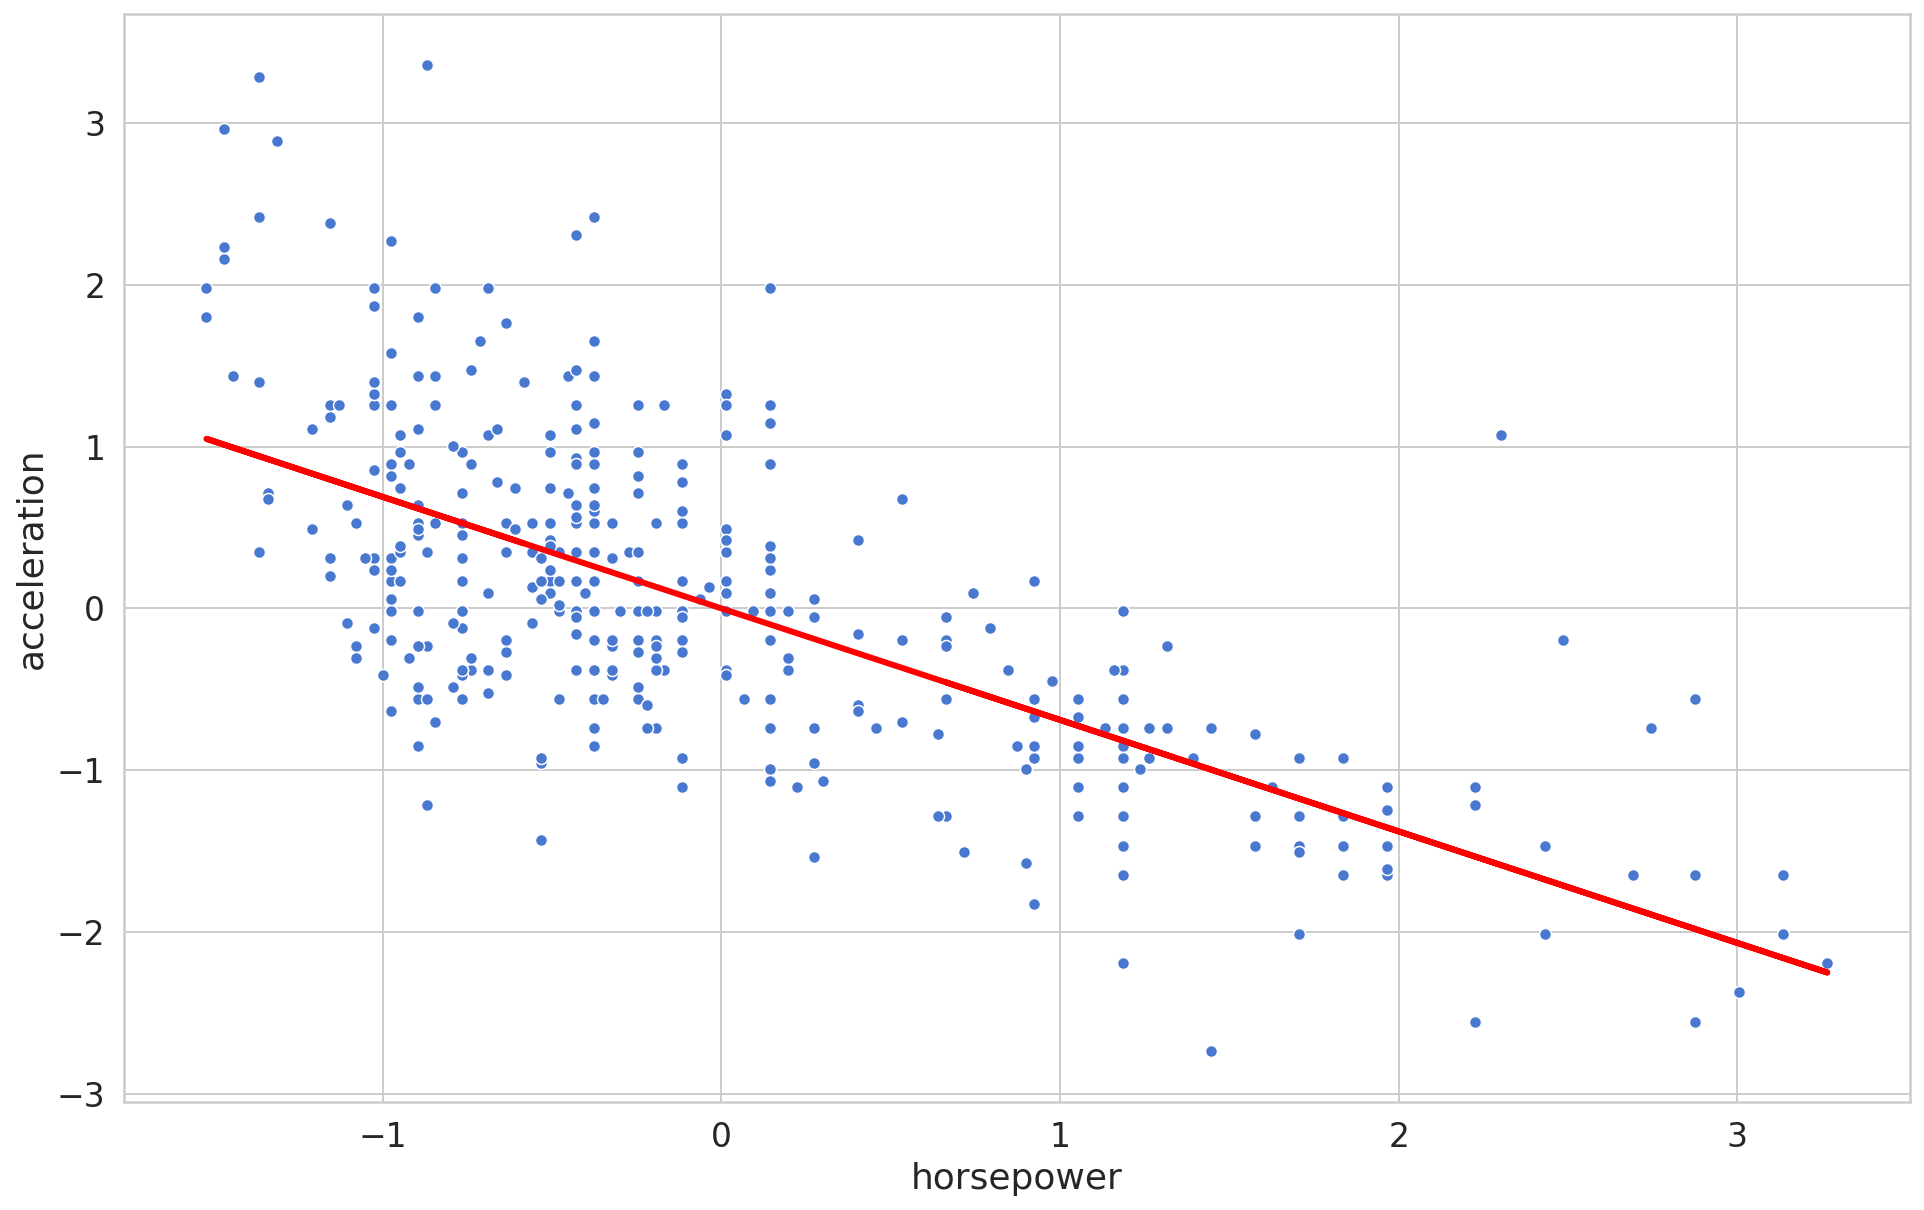

In [0]:
y_pred = reg.predict(X)

sns.scatterplot(X.horsepower, y)
plt.plot(X, y_pred, linewidth=3, color="red");

## Multiple Linear Regression

In [0]:
X, y = create_regression_dataset(auto_df)

reg = LinearRegression()
eval_regressor(reg, X, y)

0.4351523357394419

## Ridge Regression

In [0]:
from sklearn.linear_model import Ridge

X, y = create_regression_dataset(auto_df)

reg = Ridge(alpha=0.0005, random_state=RANDOM_SEED)

eval_regressor(reg, X, y)

0.4351510356810997

# Logistic Regression

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


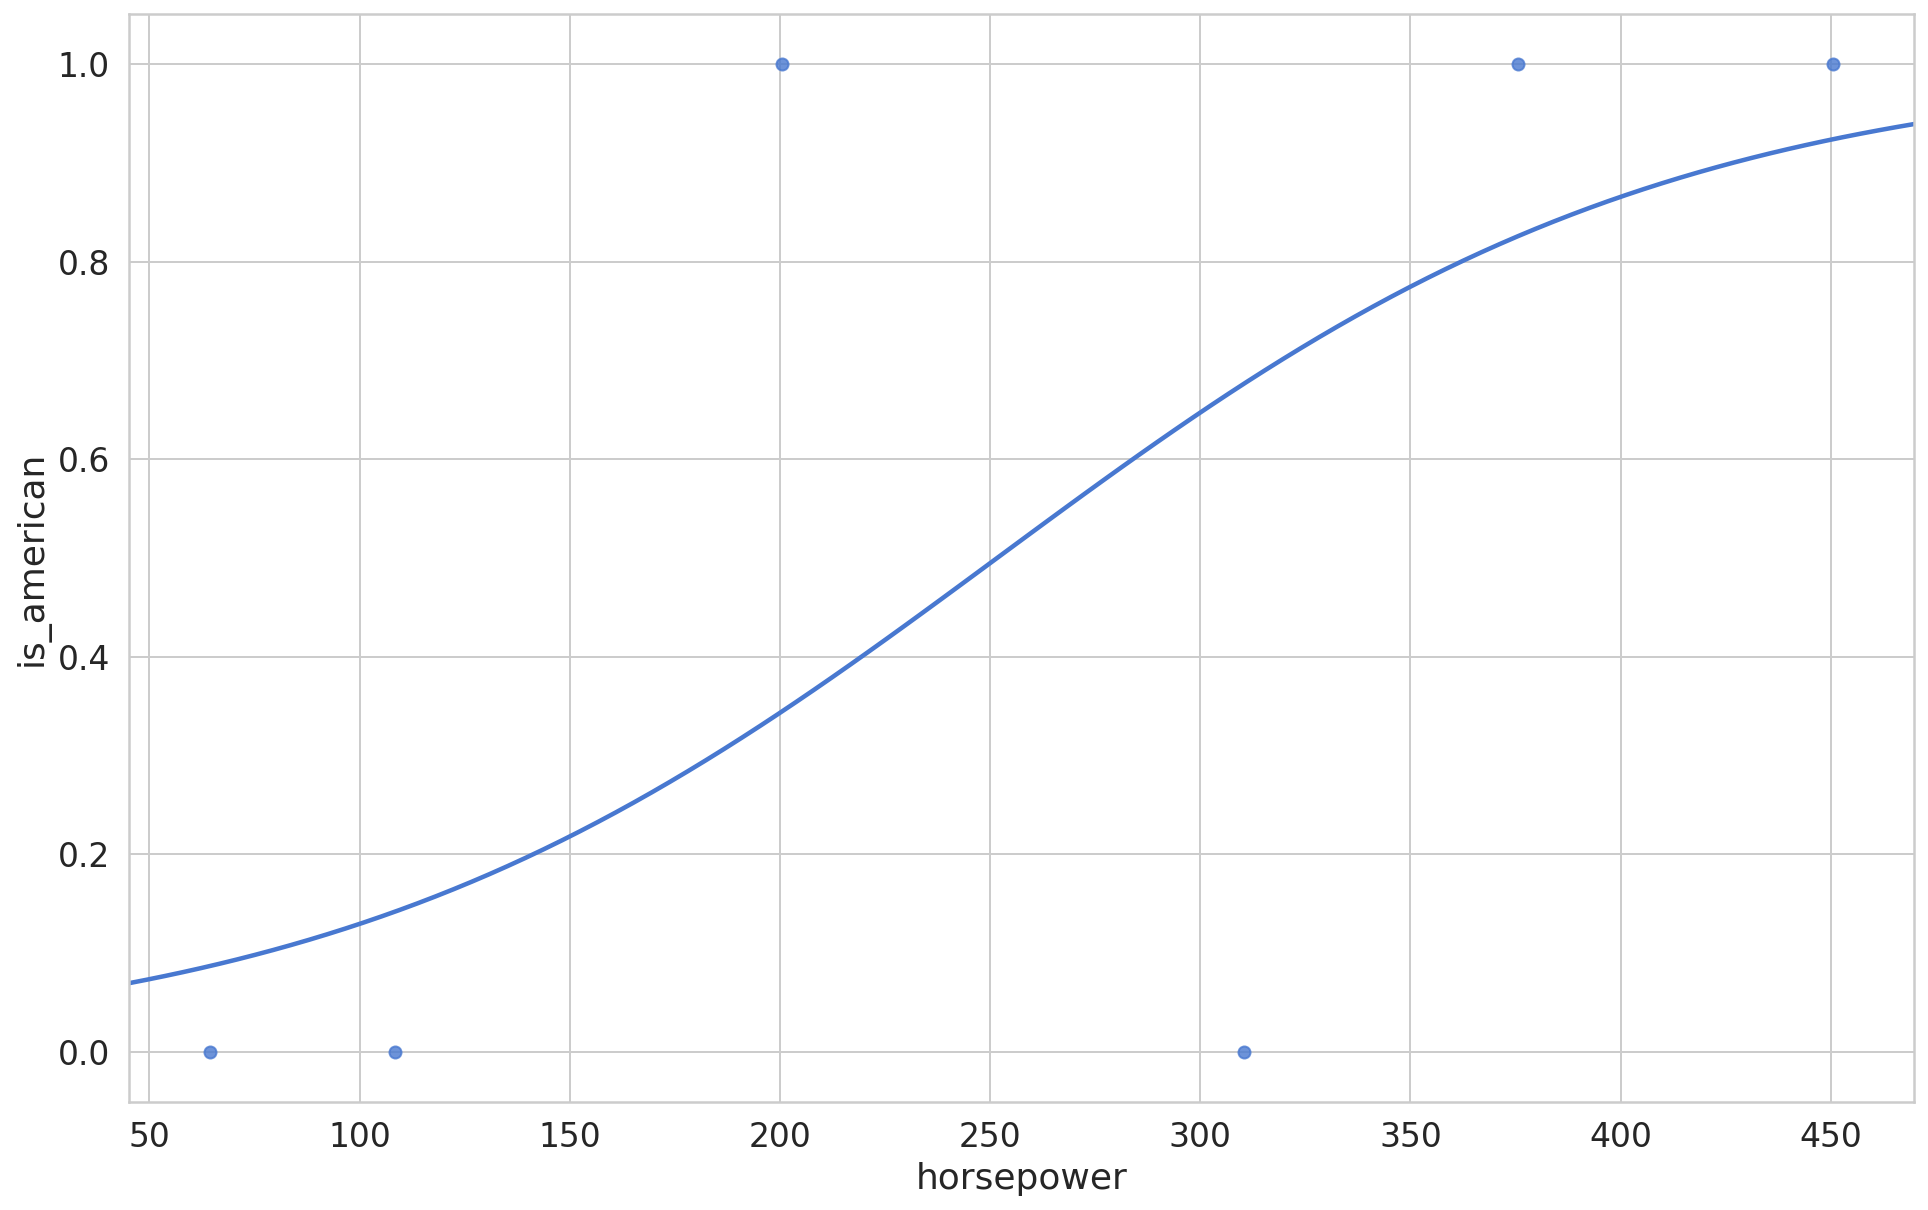

In [0]:
toy_df = pd.DataFrame.from_dict({
  "horsepower": [64.5, 310.5, 108.5, 200.5, 375.5, 450.5],
  "is_american": [False, False, False, True, True, True]
})

ax = sns.regplot(x="horsepower", y="is_american", data=toy_df,
                  logistic=True, n_boot=100)

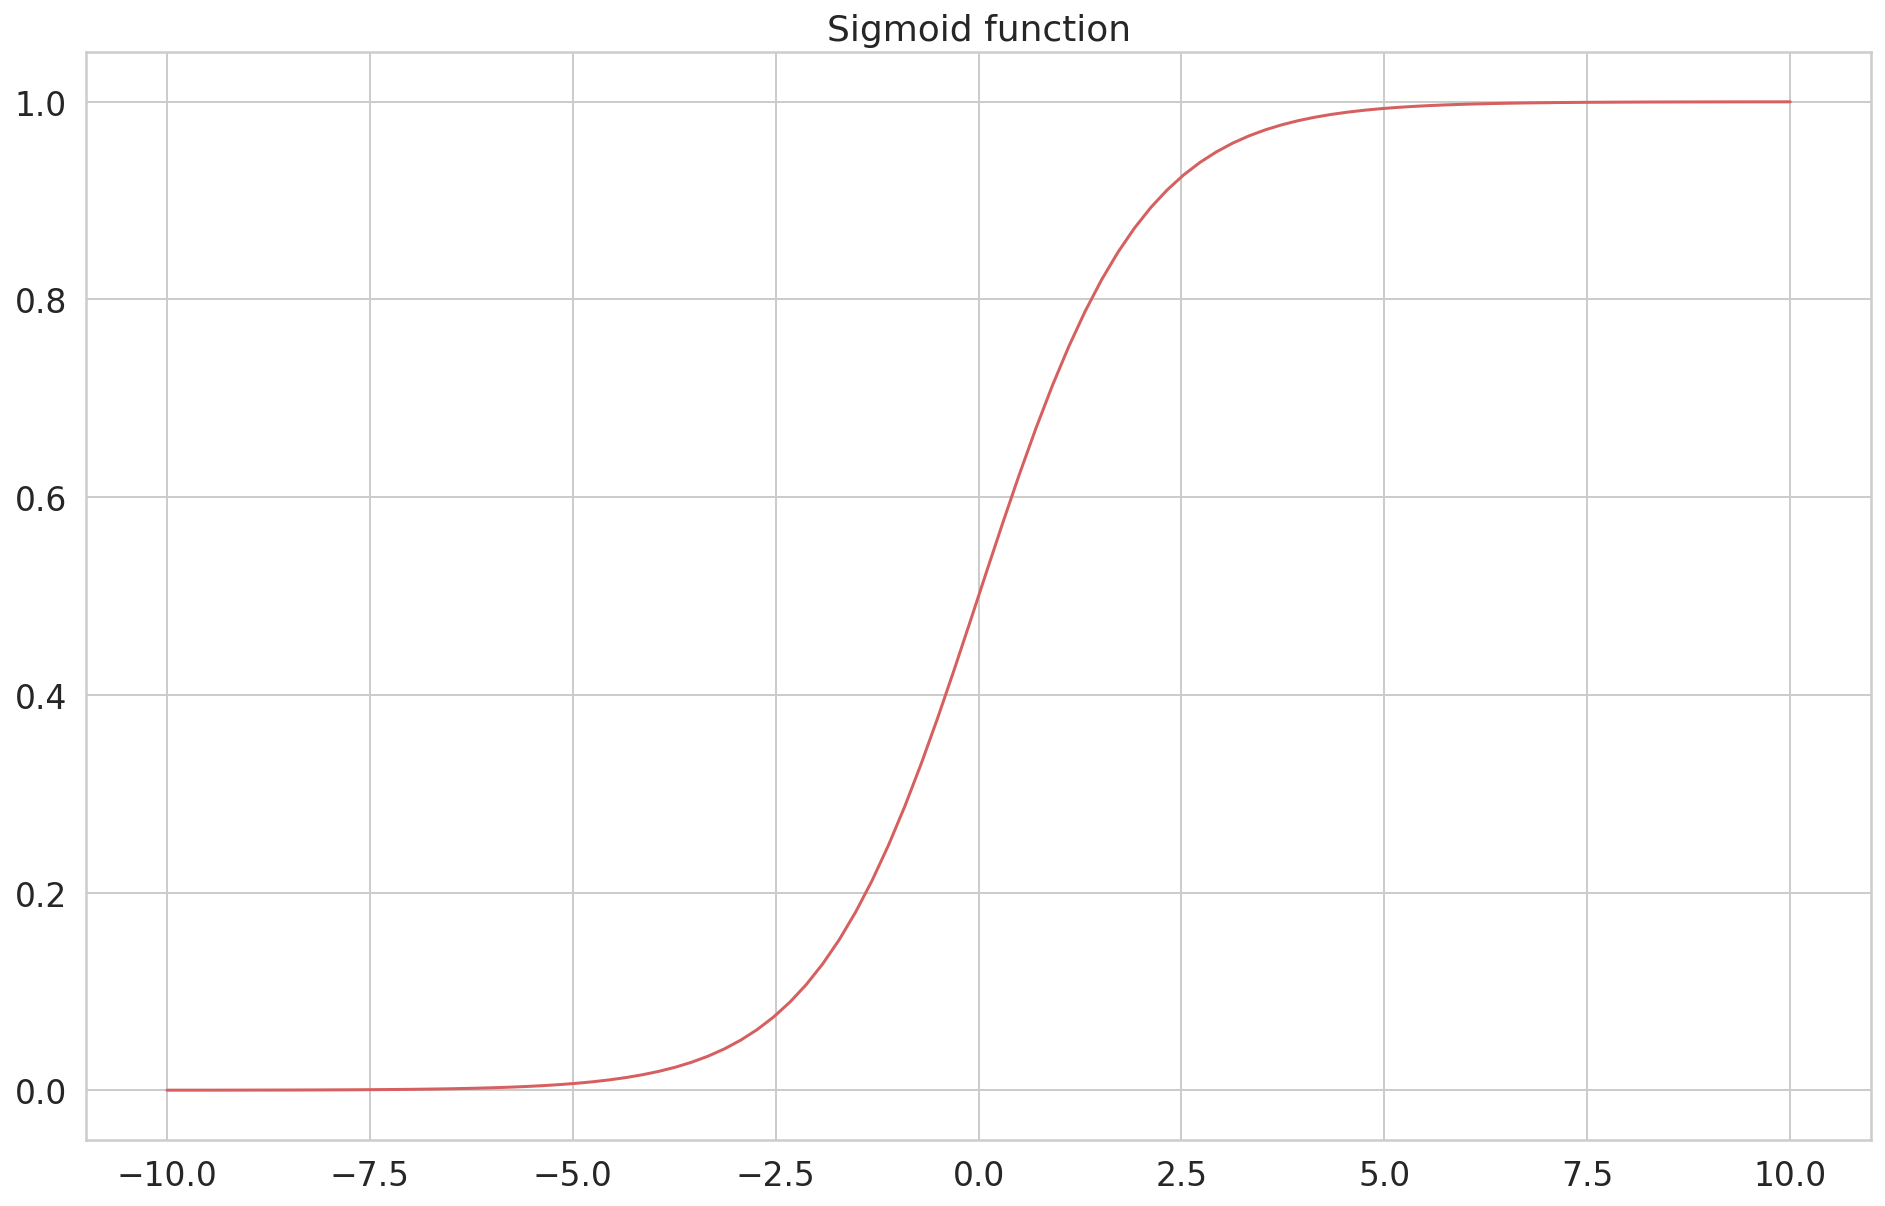

In [0]:
from scipy.special import expit

x = np.linspace(-10, 10, 100)
y = expit(x)

plt.plot(x, y,'r')
plt.title("Sigmoid function");

In [0]:
from sklearn.linear_model import LogisticRegression

X, y = create_classification_dataset(auto_df)

clf = LogisticRegression(solver="lbfgs")
eval_classifier(clf, X, y)

0.787948717948718

# K-Nearest Neighbors

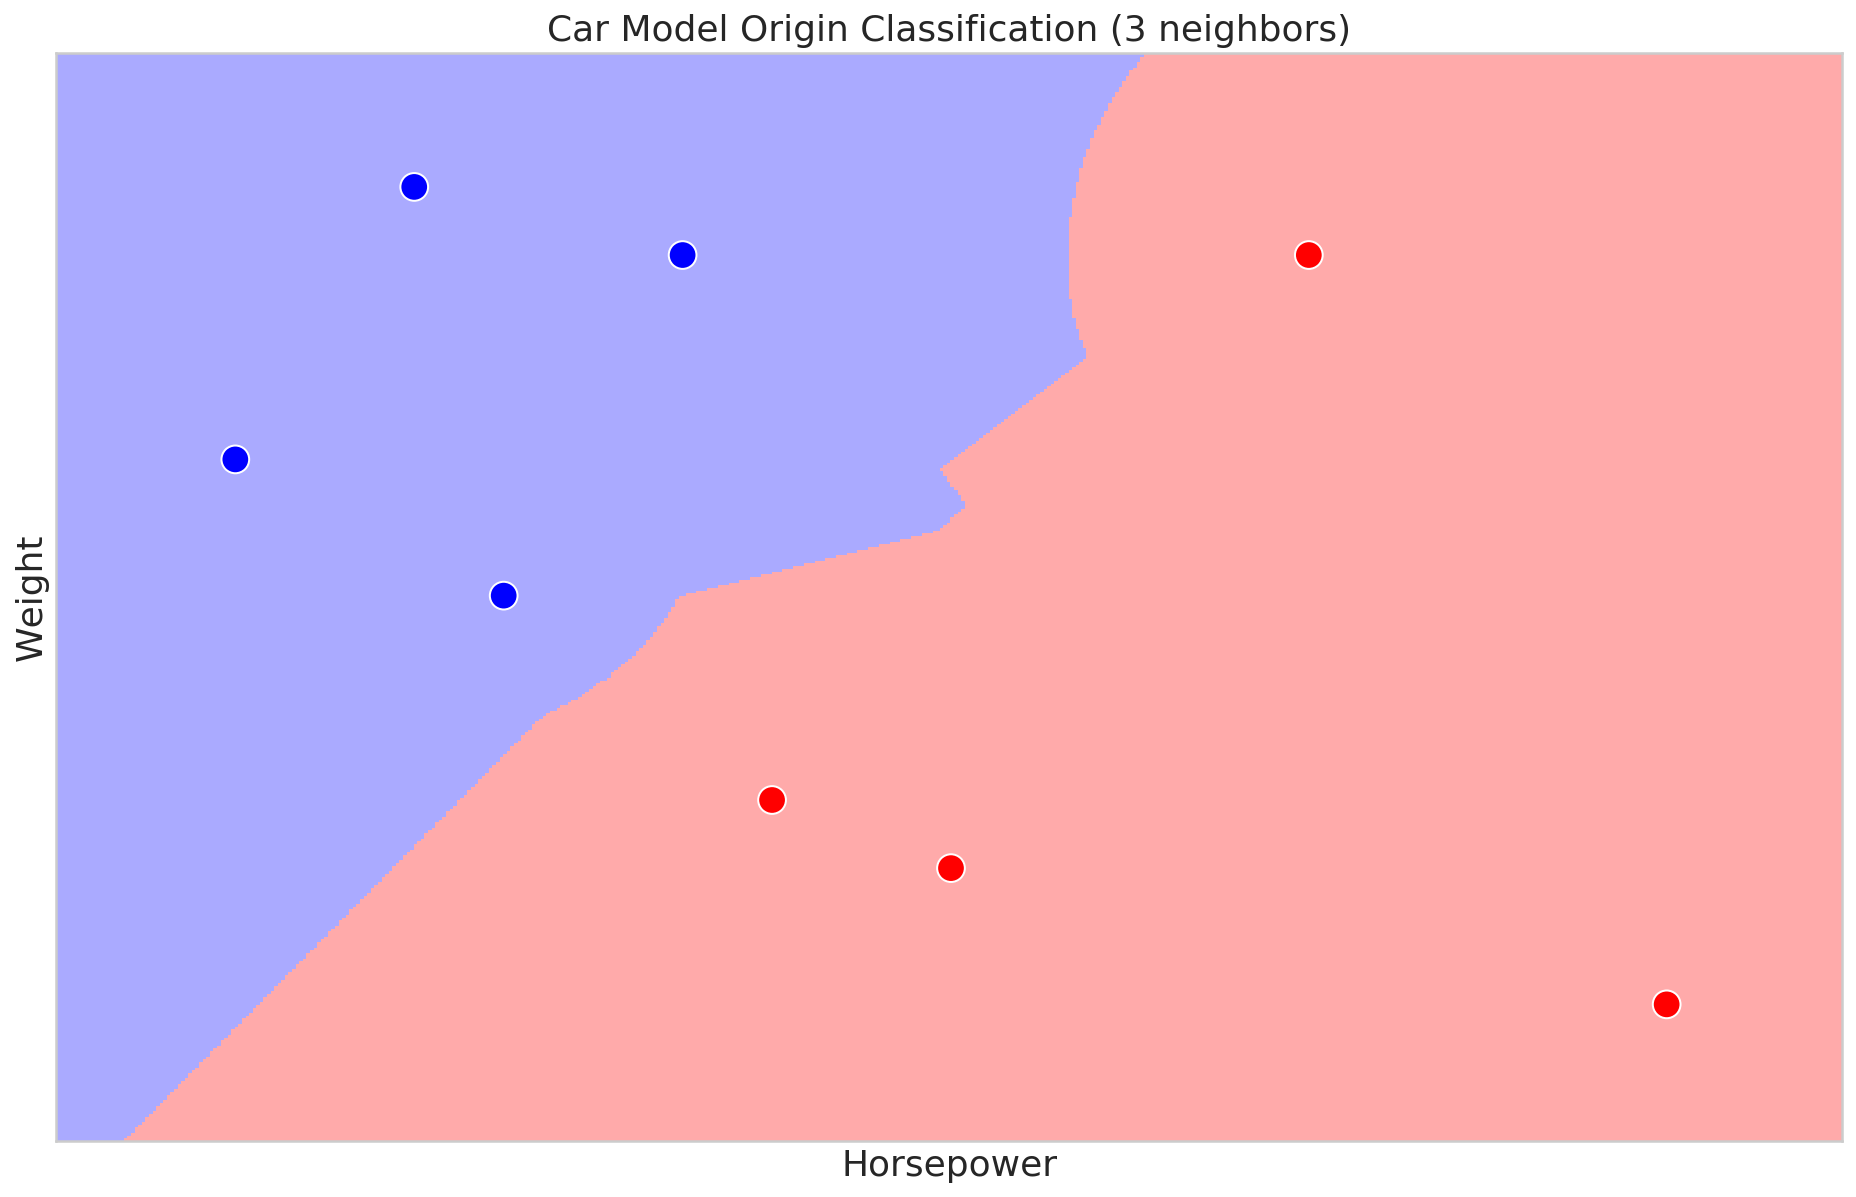

In [0]:
# heavily based on https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 3

X = np.array([
  [1, 6.5],
  [2, 8.5],
  [2.5, 5.5],
  [3.5, 8],
  [4, 4],
  [5, 3.5],
  [7, 8],
  [9, 2.5],
])

y = np.array(
    [1, 1, 1, 1, 0, 0, 0, 0]
)

h = .02

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='w', s=192)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'Car Model Origin Classification ({n_neighbors} neighbors)')
plt.xlabel("Horsepower")
plt.ylabel("Weight")
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier

X, y = create_classification_dataset(auto_df)

clf = KNeighborsClassifier(n_neighbors=24)
eval_classifier(clf, X, y)

0.8008333333333335

# Naive Bayes

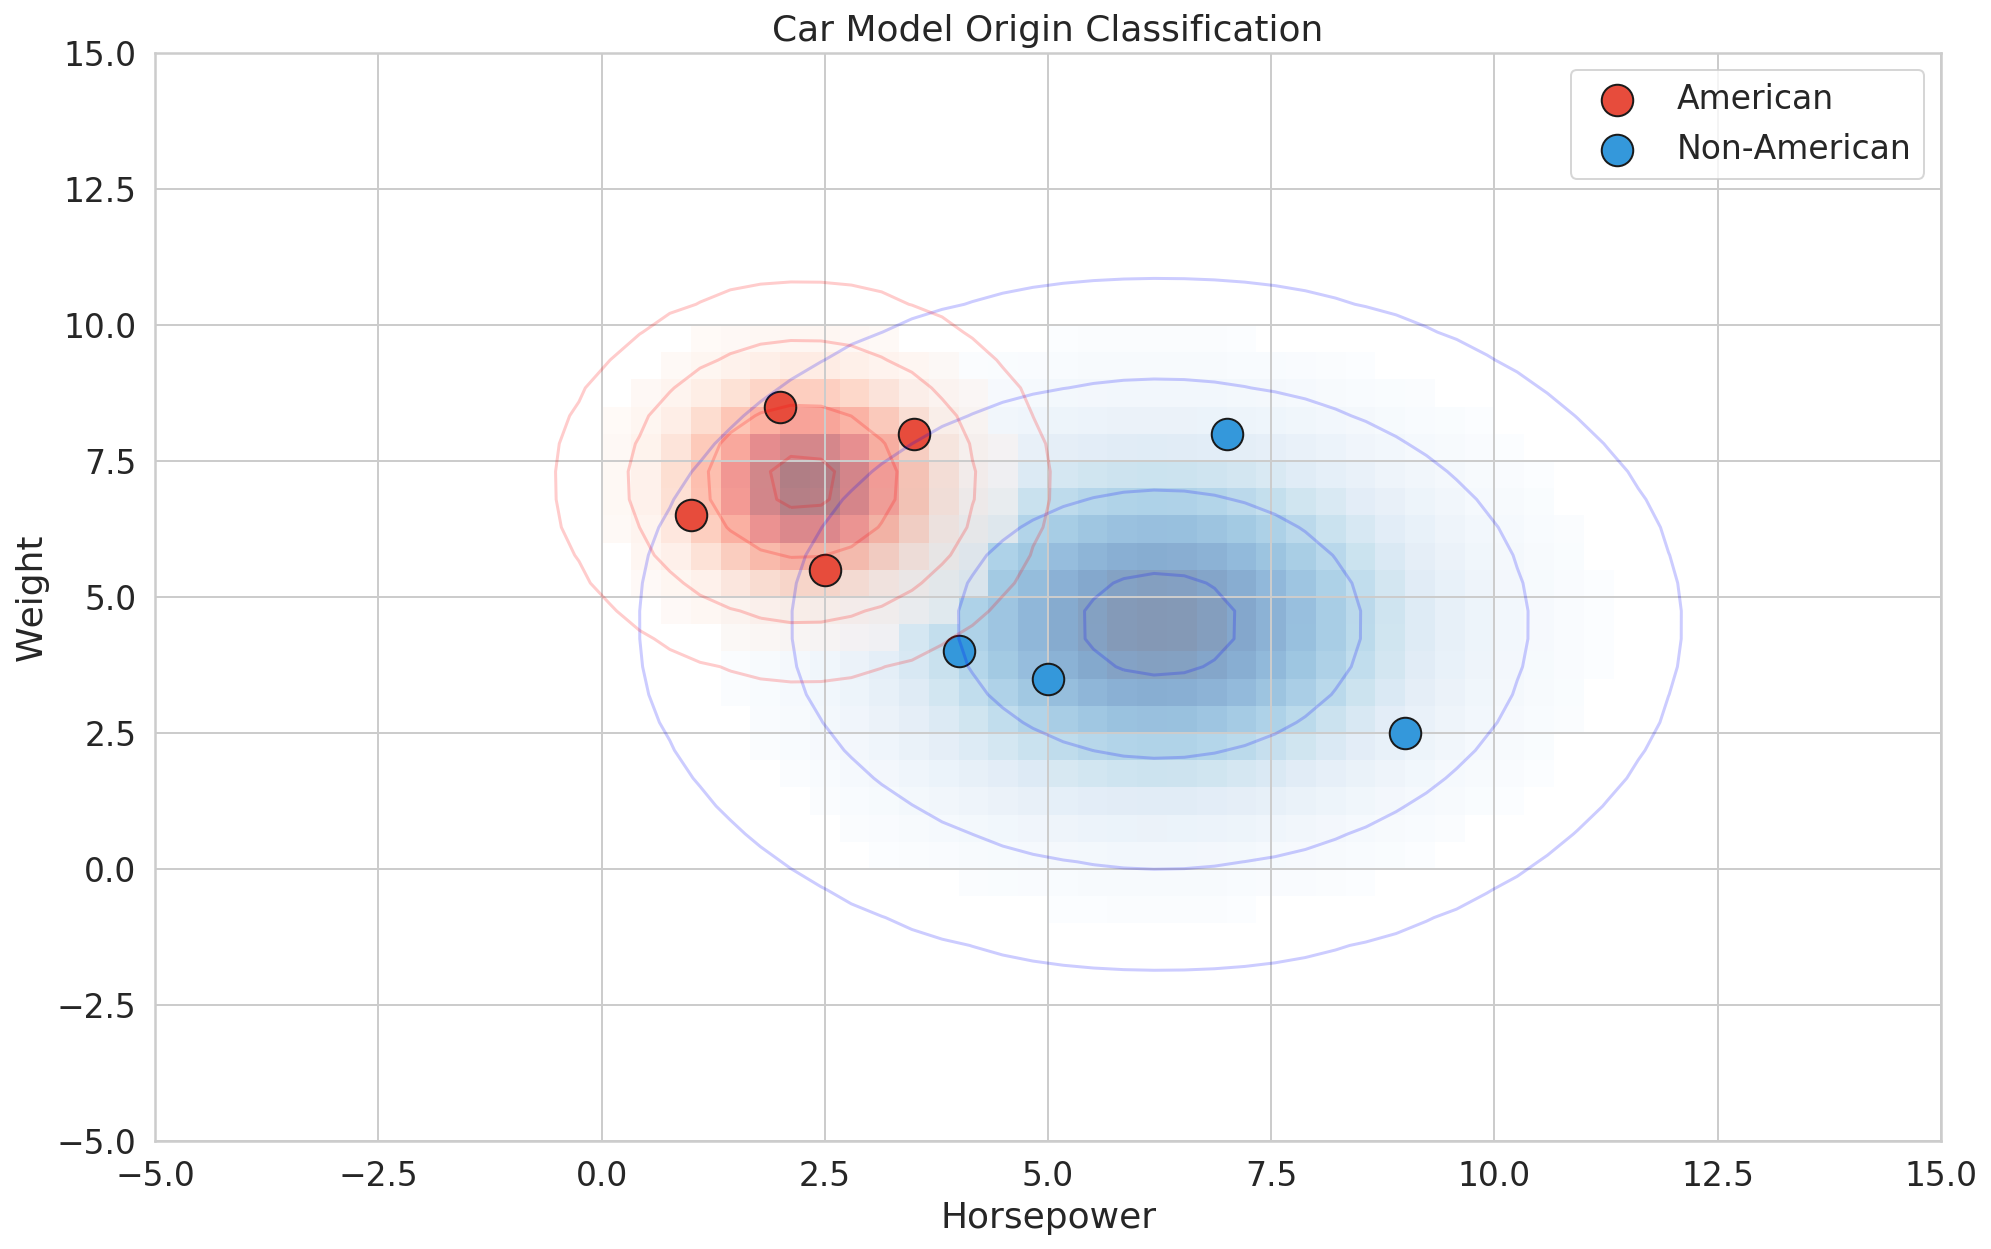

In [0]:
# heavily based on https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

X = np.array([
  [1, 6.5],
  [2, 8.5],
  [2.5, 5.5],
  [3.5, 8],
  [4, 4],
  [5, 3.5],
  [7, 8],
  [9, 2.5],
])

y = np.array(
    [1, 1, 1, 1, 0, 0, 0, 0]
)

fig, ax = plt.subplots()

american_mask = y == 1
non_american_mask = y == 0

ax.scatter(X[:, 0][american_mask], X[:, 1][american_mask], c="#e74c3c",  s=248, label="American", edgecolors='k')
ax.scatter(X[:, 0][non_american_mask], X[:, 1][non_american_mask], c="#3498db",  s=248, label="Non-American", edgecolors='k')

ax.set_title('Car Model Origin Classification')

xlim = (-5, 15)
ylim = (-5, 15)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['blue', 'red']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)
ax.set_xlabel("Horsepower")
ax.set_ylabel("Weight")
ax.legend();

In [0]:
from sklearn.naive_bayes import GaussianNB

X, y = create_classification_dataset(auto_df)

clf = GaussianNB()
eval_classifier(clf, X, y)

0.7597435897435898

# Decision Trees

[Text(357.12, 453.0, 'horsepower <= 95.0\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = non-american'),
 Text(178.56, 271.8, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = american'),
 Text(535.6800000000001, 271.8, 'weight <= 27.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = non-american'),
 Text(357.12, 90.59999999999997, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = non-american'),
 Text(714.24, 90.59999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = american')]

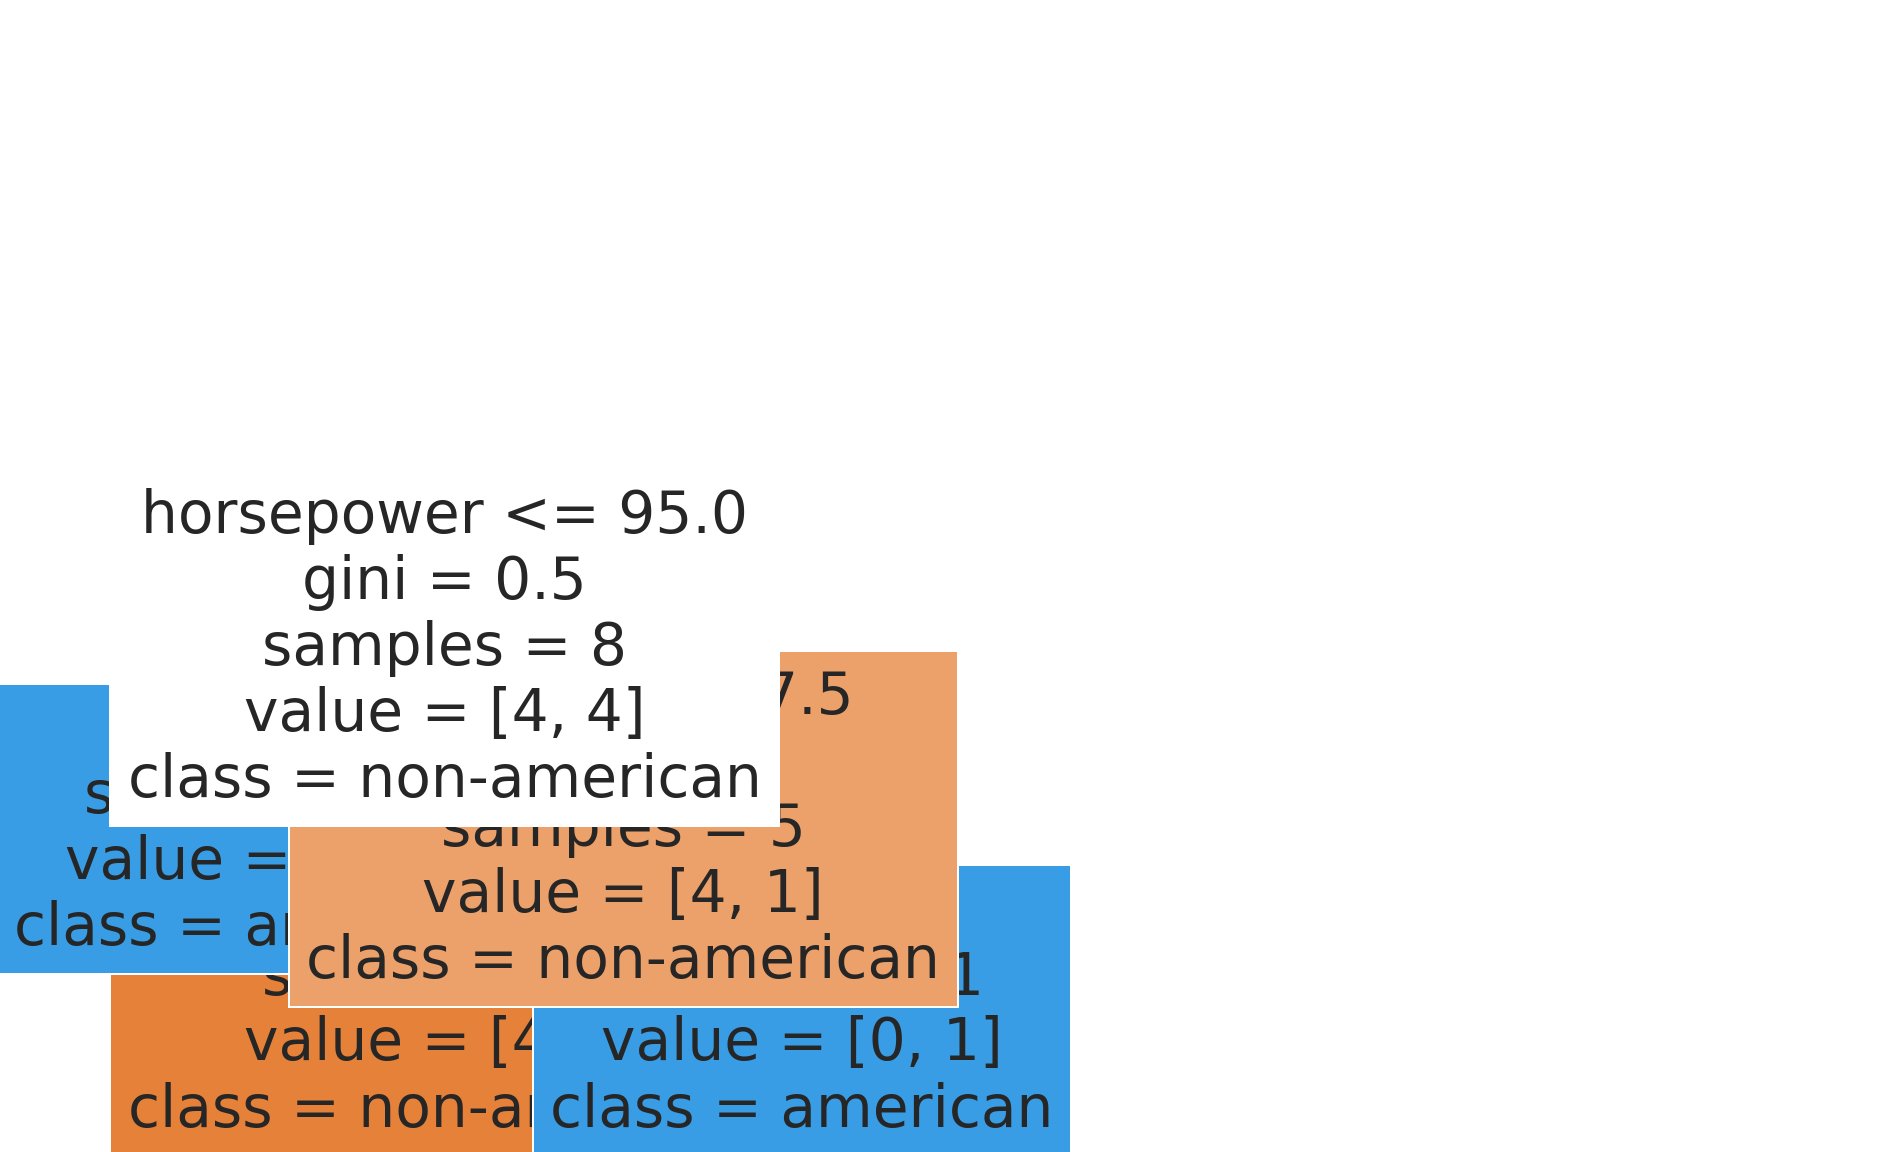

In [0]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = np.array([
  [33, 115.5],
  [20, 90.5],
  [8.5, 55.5],
  [12.5, 88],
  [8, 145],
  [4, 332.5],
  [22, 282],
  [9, 99.5],
])

X = pd.DataFrame(X, columns=['weight', 'horsepower'])

y = np.array(
    [1, 1, 1, 1, 0, 0, 0, 0]
)

clf = DecisionTreeClassifier().fit(X, y)

fix, ax = plt.subplots(figsize=(16, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['non-american', 'american'])

In [0]:
from sklearn.tree import DecisionTreeRegressor

X, y = create_regression_dataset(auto_df)

reg = DecisionTreeRegressor()
eval_regressor(reg, X, y)

0.6739687671968857

In [0]:
from sklearn.ensemble import RandomForestRegressor

X, y = create_regression_dataset(auto_df)

reg = RandomForestRegressor(n_estimators=50)
eval_regressor(reg, X, y)

0.3954286721482007

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

X, y = create_regression_dataset(auto_df)

reg = GradientBoostingRegressor(n_estimators=100)
eval_regressor(reg, X, y)

0.3774890120977956

# Support Vector Machines

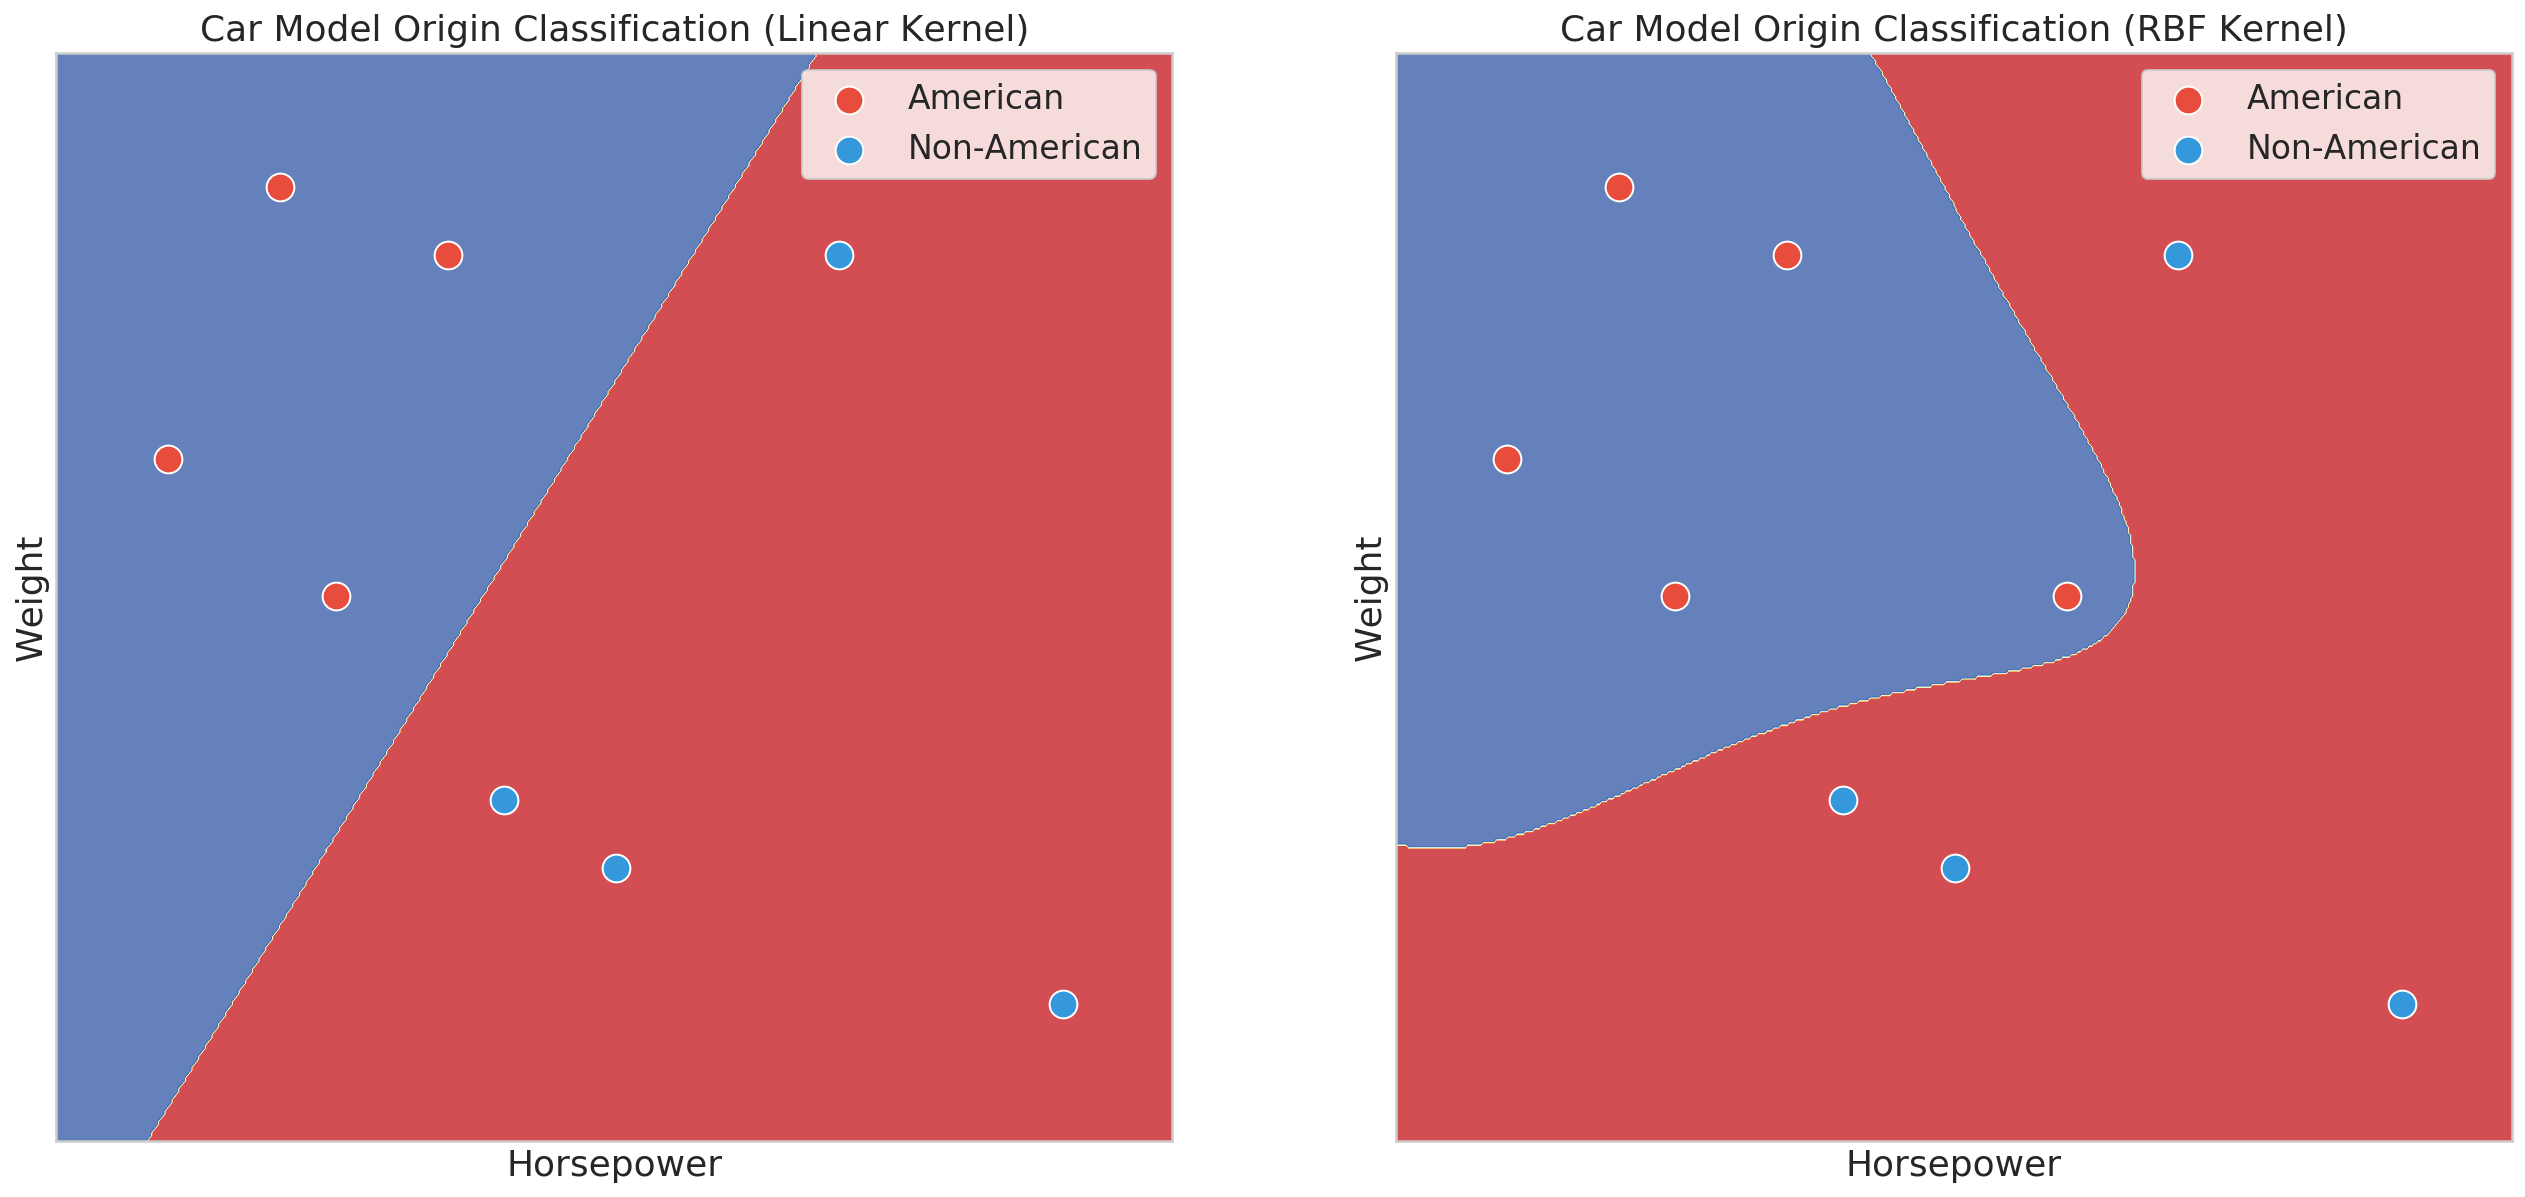

In [0]:
from sklearn.svm import SVC


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return ax.contourf(xx, yy, Z, **params)

def plot_decision_boundary(ax, clf, X, y, kernel):
  X0, X1 = X[:, 0], X[:, 1]
  xx, yy = make_meshgrid(X0, X1)

  american_mask = y == 1
  non_american_mask = y == 0

  plot_contours(ax, clf, xx, yy, cmap=plt.cm.RdYlBu, alpha=0.8)
  ax.scatter(X0[american_mask], X1[american_mask], c="#e74c3c",  s=192, label="American", edgecolors='white')
  ax.scatter(X0[non_american_mask], X1[non_american_mask], c="#3498db",  s=192, label="Non-American", edgecolors='white')
  ax.set_ylabel('Weight')
  ax.set_xlabel('Horsepower')
  ax.set_title(f'Car Model Origin Classification ({kernel} Kernel)')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.legend();

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(22, 10))

X = np.array([
  [1, 6.5],
  [2, 8.5],
  [2.5, 5.5],
  [3.5, 8],
  [4, 4],
  [5, 3.5],
  [7, 8],
  [9, 2.5],
])

y = np.array(
    [1, 1, 1, 1, 0, 0, 0, 0]
)

clf = SVC(kernel='linear', gamma='scale').fit(X, y)

plot_decision_boundary(ax1, clf, X, y, kernel="Linear")

X = np.array([
  [1, 6.5],
  [2, 8.5],
  [2.5, 5.5],
  [3.5, 8],
  [6, 5.5],
  [4, 4],
  [5, 3.5],
  [7, 8],
  [9, 2.5],
])

y = np.array(
    [1, 1, 1, 1, 1, 0, 0, 0, 0]
)

clf = SVC(kernel='rbf', gamma='scale', C=2.5).fit(X, y)

plot_decision_boundary(ax2, clf, X, y, kernel="RBF")

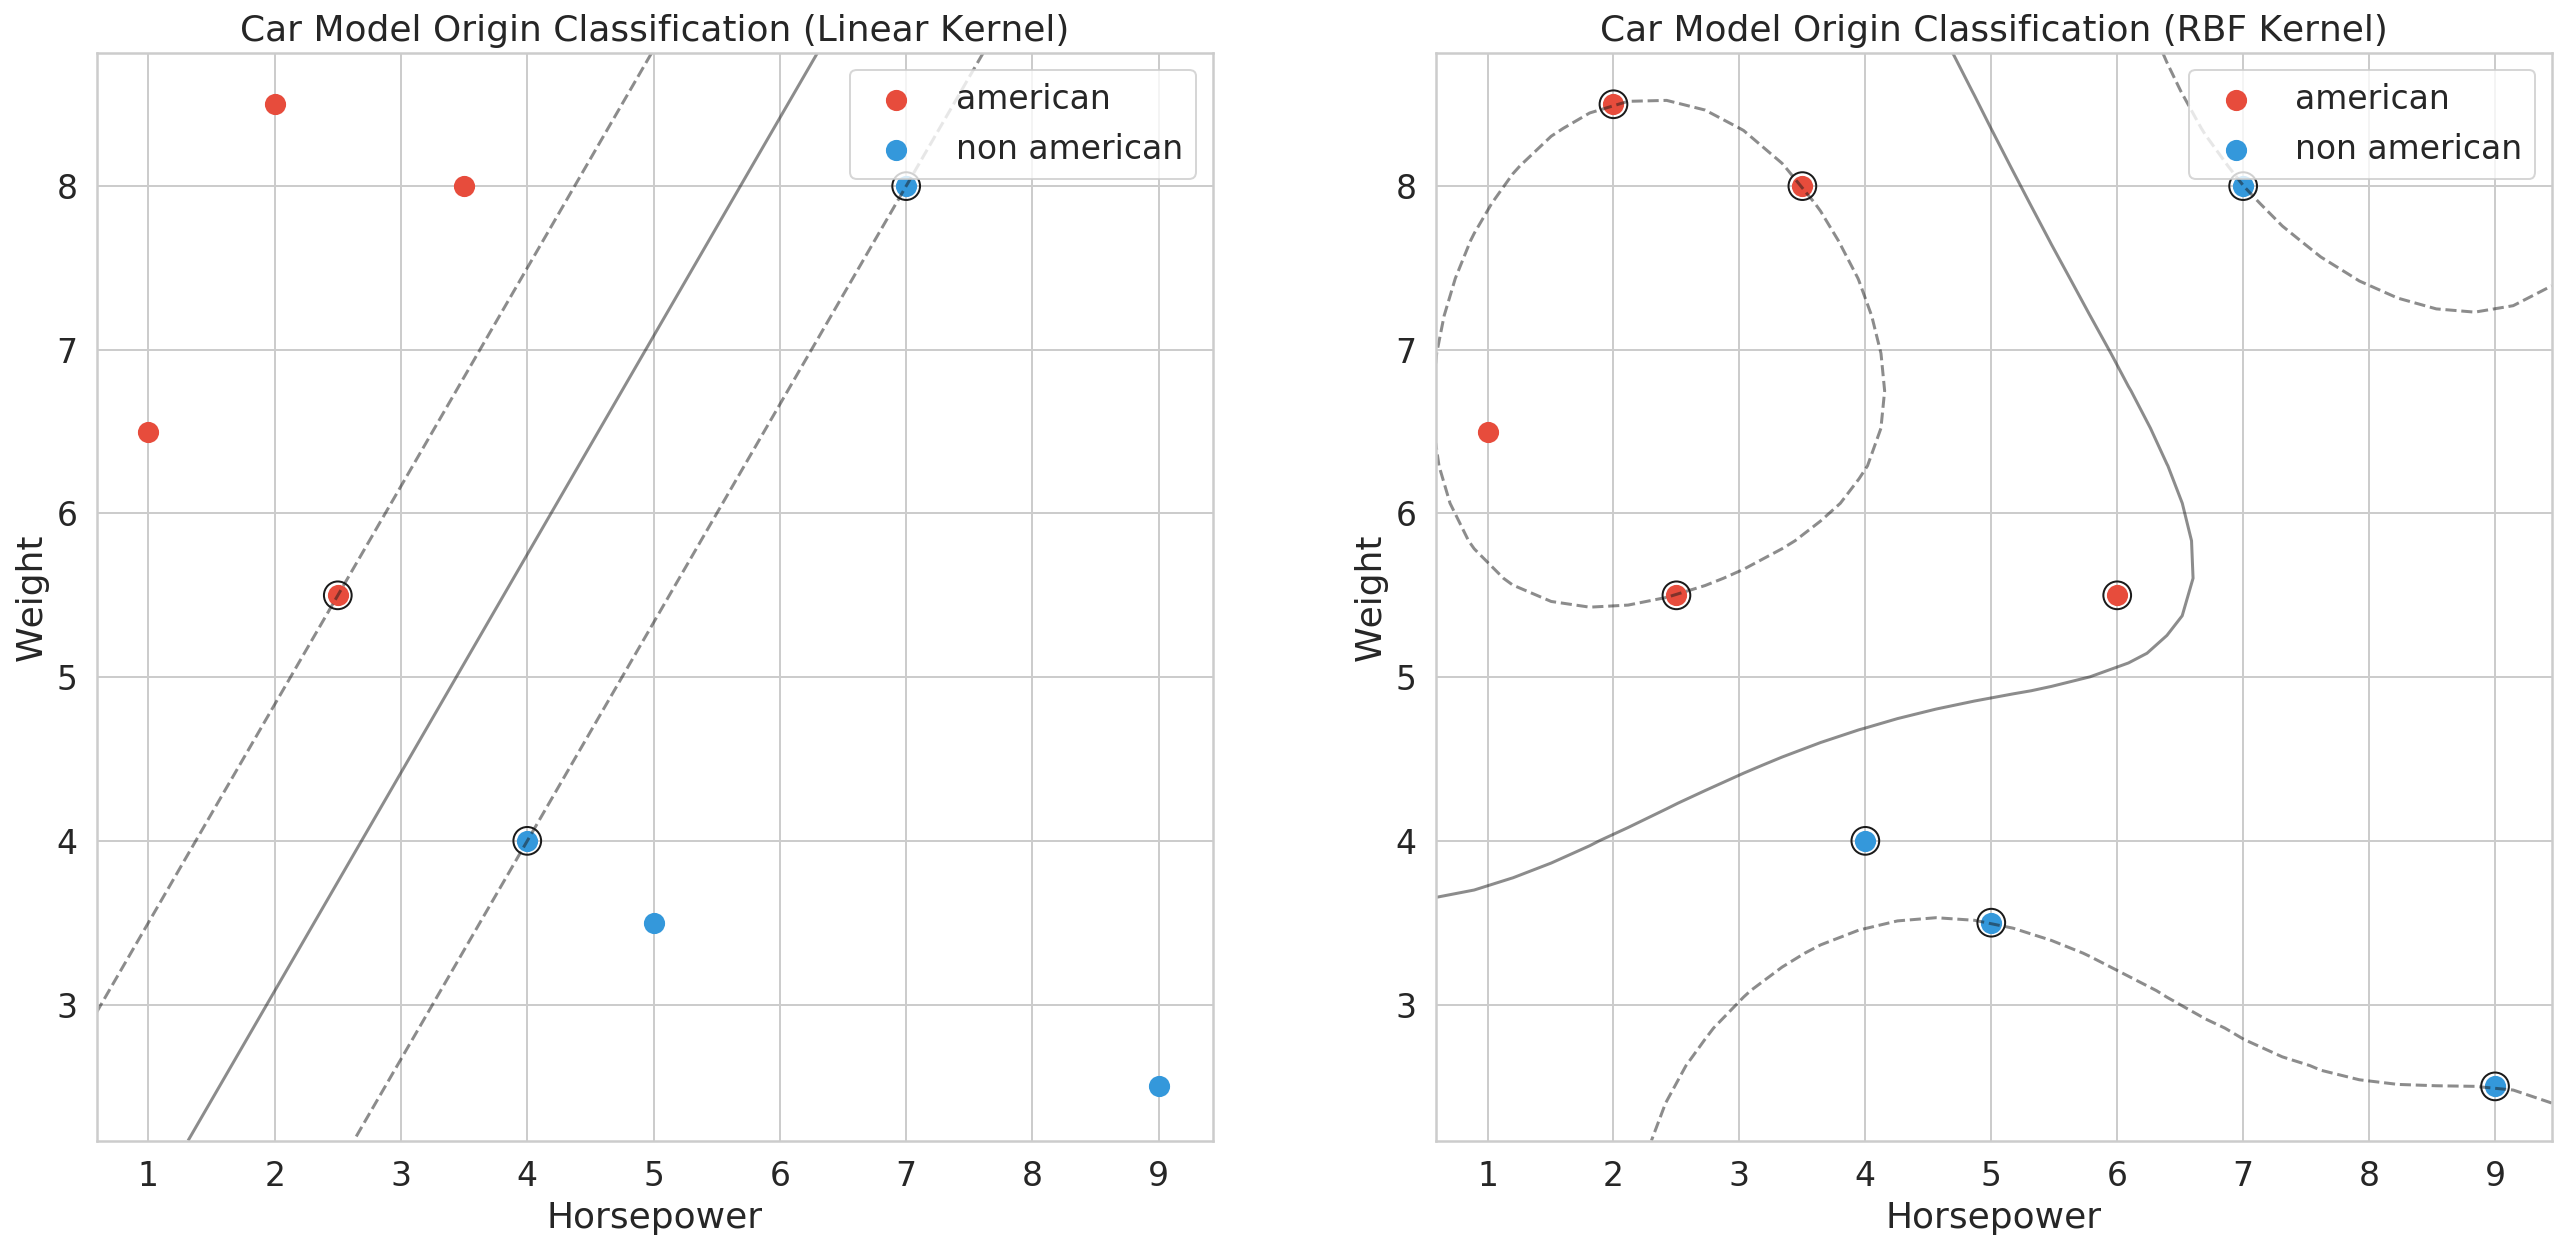

In [0]:
from sklearn import svm

def plot_decision_boundary(clf, X, y, ax, kernel):

  american_mask = y == 1
  non_american_mask = y == 0

  ax.scatter(X[:, 0][american_mask], X[:, 1][american_mask], c="#e74c3c", label="american", s=92, cmap=plt.cm.Paired)
  ax.scatter(X[:, 0][non_american_mask], X[:, 1][non_american_mask], c="#3498db", label="non american", s=92, cmap=plt.cm.Paired)

  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  Z = clf.decision_function(xy).reshape(XX.shape)

  ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])

  ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=192,
            linewidth=1, facecolors='none', edgecolors='k')
  ax.set_ylabel('Weight')
  ax.set_xlabel('Horsepower')
  ax.set_title(f'Car Model Origin Classification ({kernel} Kernel)')
  ax.legend()


X = np.array([
  [1, 6.5],
  [2, 8.5],
  [2.5, 5.5],
  [3.5, 8],
  [4, 4],
  [5, 3.5],
  [7, 8],
  [9, 2.5],
])

y = np.array(
    [1, 1, 1, 1, 0, 0, 0, 0]
)

clf = svm.SVC(kernel='linear', C=1000).fit(X, y)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(22, 10))


plot_decision_boundary(clf, X, y, ax1, "Linear")

X = np.array([
  [1, 6.5],
  [2, 8.5],
  [2.5, 5.5],
  [3.5, 8],
  [6, 5.5],
  [4, 4],
  [5, 3.5],
  [7, 8],
  [9, 2.5],
])

y = np.array(
    [1, 1, 1, 1, 1, 0, 0, 0, 0]
)

clf = SVC(kernel='rbf', gamma='scale', C=2.5).fit(X, y)

plot_decision_boundary(clf, X, y, ax2, "RBF")

In [0]:
from sklearn.svm import SVR

X, y = create_regression_dataset(auto_df)

reg = SVR(gamma="auto", kernel="rbf", C=4.5)
eval_regressor(reg, X, y)

0.32820308689067834